## Using numpy for linear algebra

In [1]:
import numpy as np
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print(x1,x2,x3,sep="\n")

[1 2 1]
[4 1 5]
[6 8 6]


In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)

In [3]:
X = np.concatenate((x1,x2,x3), axis=0)
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

In [4]:
X_inverse = X.getI()
X_inverse

matrix([[-8.5000000e+00, -1.0000000e+00,  2.2500000e+00],
        [ 1.5000000e+00, -7.6861594e-17, -2.5000000e-01],
        [ 6.5000000e+00,  1.0000000e+00, -1.7500000e+00]])

In [5]:
X_inverse = np.round(X_inverse, 2)
X_inverse

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 , -0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

## Ordinary Least Squares

In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

In [7]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                         names =data.index.names)
multi_index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1971-01-01'),
            ('AGO', '1972-01-01'),
            ('AGO', '1973-01-01'),
            ('AGO', '1974-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1976-01-01'),
            ('AGO', '1977-01-01'),
            ('AGO', '1978-01-01'),
            ('AGO', '1979-01-01'),
            ...
            ('ZWE', '2006-01-01'),
            ('ZWE', '2007-01-01'),
            ('ZWE', '2008-01-01'),
            ('ZWE', '2009-01-01'),
            ('ZWE', '2010-01-01'),
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01')],
           names=['ISO_Code', 'Year'], length=7452)

In [8]:
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

In [9]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      1970-01-01              NaN                  NaN  
         1971-01-01              NaN                  NaN  
         1972-01-01              NaN                  NaN  
         1973-01-01              NaN                  NaN  
         1974-01-01              NaN                  NaN  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1404.0  
         2012-01-01           1604.0               1515.0  
         2013-01-01           1604.0               1604.0  
         2014-01-01           1594.0               1604.0  
         2015-01-01           1560.0               1594.0  

[7452 rows x 8 columns]

In [10]:
data.loc["GBR"]

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
1970-01-01  5.873943            3.627407                        7.124264   
1971-01-01       NaN                 NaN                             NaN   
1972-01-01       NaN                 NaN                             NaN   
1973-01-01       NaN                 NaN                             NaN   
1974-01-01       NaN                 NaN                             NaN   
1975-01-01  5.815599            3.025033                        7.402758   
1976-01-01       NaN                 NaN                             NaN   
1977-01-01       NaN                 NaN                             NaN   
1978-01-01       NaN                 NaN                             NaN   
1979-01-01       NaN                 NaN                             NaN   
1980-01-01  6.449941            3.981471                        6.249600   
1981-01-01       NaN                 NaN                             NaN   
1982-01-01       NaN                 NaN                             NaN   
1983-01-01       NaN                 NaN                             NaN   
1984-01-01       NaN                 NaN                             NaN   
1985-01-01  7.401115            4.652913                        5.903596   
1986-01-01       NaN                 NaN                             NaN   
1987-01-01       NaN                 NaN                             NaN   
1988-01-01       NaN                 NaN                             NaN   
1989-01-01       NaN                 NaN                             NaN   
1990-01-01  7.939640            5.961256                        6.862864   
1991-01-01       NaN                 NaN                             NaN   
1992-01-01       NaN                 NaN                             NaN   
1993-01-01       NaN                 NaN                             NaN   
1994-01-01       NaN                 NaN                             NaN   
1995-01-01  8.076496            5.718541                        7.848163   
1996-01-01       NaN                 NaN                             NaN   
1997-01-01       NaN                 NaN                             NaN   
1998-01-01       NaN                 NaN                             NaN   
1999-01-01       NaN                 NaN                             NaN   
2000-01-01  8.518925            7.194097                        8.248599   
2001-01-01  8.452018            6.961156                        8.234602   
2002-01-01  8.490705            7.139978                        8.144261   
2003-01-01  8.499127            7.039513                        8.245855   
2004-01-01  8.382597            6.920611                        8.069173   
2005-01-01  8.393285            6.922756                        8.265496   
2006-01-01  8.302836            6.914460                        7.982602   
2007-01-01  8.192020            6.929650                        7.644268   
2008-01-01  8.025975            6.161823                        7.807282   
2009-01-01  8.010150            6.282977                        7.979651   
2010-01-01  8.028130            6.002021                        7.971147   
2011-01-01  7.991630            6.026605                        7.966475   
2012-01-01  8.023953            6.123371                        7.825436   
2013-01-01  8.003675            6.479671                        7.812331   
2014-01-01  7.973524            6.118760                        7.829461   
2015-01-01  8.075913            6.161316                        7.921505   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
1970-01-01     7.635725                          4.215819    7.335440   
1971-01-01          NaN                               NaN         NaN   
1972-01-01          NaN                               NaN         NaN   
197

## Running your OLS Regression

In [11]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government",
         "Legal System & Property Rights",
         "Sound Money",
         "Freedom to trade internationally",
         "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           5136.0            4.652865   
         2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  
ISO_Code Year                                                      
AGO      2005-01-01                          6.218266    4.729310  
         2006-01-01                          6.158949    5.306135  
         2007-01-01                          6.115462    5.524626  
         2008-01-01                          5.687976    5.221726  
         2009-01-01                          5.811844    5.011598  
...                                               ...         ...  
ZWE      2011-01-01                          5.366773    4.372878  
         2012-01-01                          5.132305    3.661438  
         2013-01-01                          5.589087    3.848068  
         2014-01-01                          5.909121    3.987721  
         2015-01-01                          5.679719    6.643620  

[2579 rows x 6 columns]

In [12]:
reg_data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.18   
Size of Government                          -0.18                1.00   
Legal System & Property Rights               0.65               -0.10   
Sound Money                                  0.42                0.20   
Freedom to trade internationally             0.47                0.24   
Regulation                                   0.48                0.21   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.65         0.42   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita                                               0.47        0.48  
Size of Government                                            0.24        0.21  
Legal System & Property Rights                                0.63        0.59  
Sound Money                                                   0.68        0.60  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [13]:
reg_data.describe().round(2)

RGDP Per Capita  Size of Government  Legal System & Property Rights  \
count          2579.00             2579.00                         2579.00   
mean          17014.47                6.35                            5.23   
std           18238.81                1.24                            1.74   
min             523.00                1.57                            0.99   
25%            3993.50                5.52                            3.96   
50%           10970.00                6.42                            5.17   
75%           24312.00                7.18                            6.35   
max          156029.00                9.51                            9.14   

       Sound Money  Freedom to trade internationally  Regulation  
count      2579.00                           2579.00     2579.00  
mean          7.76                              6.90        6.66  
std           1.85                              1.52        1.17  
min           0.00                              0.00        2.10  
25%           6.74                              6.18        5.93  
50%           8.11                              7.15        6.75  
75%           9.32                              7.98        7.48  
max           9.89                             10.00        9.44

In [14]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"]=1
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:01:17   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Year'>

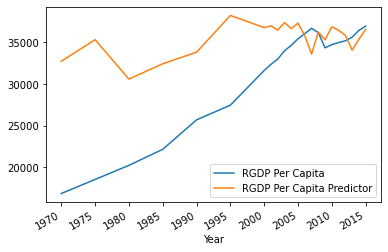

In [15]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data.loc["GBR", [y_var[0], y_var[0] + " Predictor"]].plot()

## OLS Statistics

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

$SST = SSR + SSE$

In [16]:
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]
y_hat, y_mean, y

(ISO_Code  Year      
 AGO       2005-01-01    2603.907858
           2006-01-01    5603.204806
           2007-01-01    6792.601968
           2008-01-01    6105.621665
           2009-01-01     290.800835
                            ...     
 ZWE       2011-01-01     944.453909
           2012-01-01    -760.305239
           2013-01-01     210.228904
           2014-01-01    1463.939767
           2015-01-01    9301.393871
 Name: RGDP Per Capita Predictor, Length: 2579, dtype: float64,
 17014.473051570378,
 ISO_Code  Year      
 AGO       2005-01-01    5136.0
           2006-01-01    6024.0
           2007-01-01    7173.0
           2008-01-01    7936.0
           2009-01-01    7900.0
                          ...  
 ZWE       2011-01-01    1515.0
           2012-01-01    1604.0
           2013-01-01    1604.0
           2014-01-01    1594.0
           2015-01-01    1560.0
 Name: RGDP Per Capita, Length: 2579, dtype: float64)

In [17]:
# calcuate SSE, SSR, SST
reg_data["Residuals"] = y_hat.sub(y_mean)
reg_data["Residuals"]

ISO_Code  Year      
AGO       2005-01-01   -14410.565193
          2006-01-01   -11411.268245
          2007-01-01   -10221.871083
          2008-01-01   -10908.851387
          2009-01-01   -16723.672217
                            ...     
ZWE       2011-01-01   -16070.019142
          2012-01-01   -17774.778291
          2013-01-01   -16804.244147
          2014-01-01   -15550.533285
          2015-01-01    -7713.079180
Name: Residuals, Length: 2579, dtype: float64

In [18]:
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Residuals"]

ISO_Code  Year      
AGO       2005-01-01    2.076644e+08
          2006-01-01    1.302170e+08
          2007-01-01    1.044866e+08
          2008-01-01    1.190030e+08
          2009-01-01    2.796812e+08
                            ...     
ZWE       2011-01-01    2.582455e+08
          2012-01-01    3.159427e+08
          2013-01-01    2.823826e+08
          2014-01-01    2.418191e+08
          2015-01-01    5.949159e+07
Name: Squared Residuals, Length: 2579, dtype: float64

In [19]:
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           5136.0            4.652865   
         2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor     Residuals  \
ISO_Code Year                                                  
AGO      2005-01-01                2603.907858 -14410.565193   
         2006-01-01                5603.204806 -11411.268245   
         2007-01-01                6792.601968 -10221.871083   
         2008-01-01                6105.621665 -10908.851387   
         2009-01-01                 290.800835 -16723.672217   
...                                        ...           ...   
ZWE      2011-01-01                 944.453909 -16070.019142   
         2012-01-01                -760.305239 -17774.778291   
         2013-01-01                 210.228904 -16804.244147   
         2014-01-01                1463.939767 -15550.533285   
         2015-01-01                9301.393871  -7713.079180   

                     Squared Residuals  Squared Errors  Squared Totals  
ISO_Code Year                                                           
AGO      2005-01-01       2.076644e+08    6.411491e+06    1.410981e+08  
         2006-01-01       1.302170e+08    1.770686e+05    1.207905e+08  
         2007-01-01       1.044866e+08    1.447027e+05    9.685459e+07  
         2008-01-01       1.190030e+08    3.350285e+06    8.241867e+07  
         2009-01-01       2.796812e+08    5.789991e+07    8.307362e+07  
...                                ...             ...             ...  
ZWE      2011-01-01       2.582455e+08  

In [21]:
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()

SSR, SSE, SST

(404670708653.80865, 452912119621.0687, 857582828274.877)

In [22]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n,k,estimator_variance

(2579.0, 6, 176024920.179195)

In [25]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                      55971.839907   
Legal System & Property Rights          19985.283083   
Sound Money                             -3210.007361   
Freedom to trade internationally       -16033.443310   
Regulation                             -13425.959550   
Constant                              -234757.228213   

                                  Legal System & Property Rights  \
Size of Government                                  19985.283083   
Legal System & Property Rights                      48822.833978   
Sound Money                                         -4689.138911   
Freedom to trade internationally                   -23636.666405   
Regulation                                         -23245.951675   
Constant                                           -27767.488186   

                                   Sound Money  \
Size of Government                -3210.007361   
Legal System & Property Rights    -4689.138911   
Sound Money                       40679.806245   
Freedom to trade internationally -22123.549791   
Regulation                       -15045.073804   
Constant                         -17850.266337   

                                  Freedom to trade internationally  \
Size of Government                                   -16033.443310   
Legal System & Property Rights                       -23636.666405   
Sound Money                                          -22123.549791   
Freedom to trade internationally                      77924.718718   
Regulation                                           -20195.859397   
Constant                                              -6537.109329   

                                     Regulation      Constant  
Size of Government                -13425.959550 -2.347572e+05  
Legal System & Property Rights    -23245.951675 -2.776749e+04  
Sound Money                       -15045.073804 -1.785027e+04  
Freedom to trade internationally  -20195.859397 -6.537109e+03  
Regulation                        104664.223028 -2.337718e+05  
Constant                         -233771.810176  3.442675e+06

In [26]:
results.params

Size of Government                  -2997.610594
Legal System & Property Rights       4607.183029
Sound Money                           642.419977
Freedom to trade internationally     1071.256861
Regulation                           2602.348828
Constant                           -17735.249440
dtype: float64

### Calculate T-stats

In [31]:
parameters = {}
for x_var in X.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var,x_var] ** (1/2)
    parameters[x_var]["t_stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"]

pd.DataFrame(parameters).T

Beta  Standard Error    t_stats
Size of Government                -2997.610594      236.583685 -12.670403
Legal System & Property Rights     4607.183029      220.958897  20.850860
Sound Money                         642.419977      201.692355   3.185148
Freedom to trade internationally   1071.256861      279.149993   3.837567
Regulation                         2602.348828      323.518505   8.043895
Constant                         -17735.249440     1855.444650  -9.558490

In [36]:
r2 = SSR / SST
"R^2", r2

('R^2', 0.47187361419986534)

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:14:58   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot residuals

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

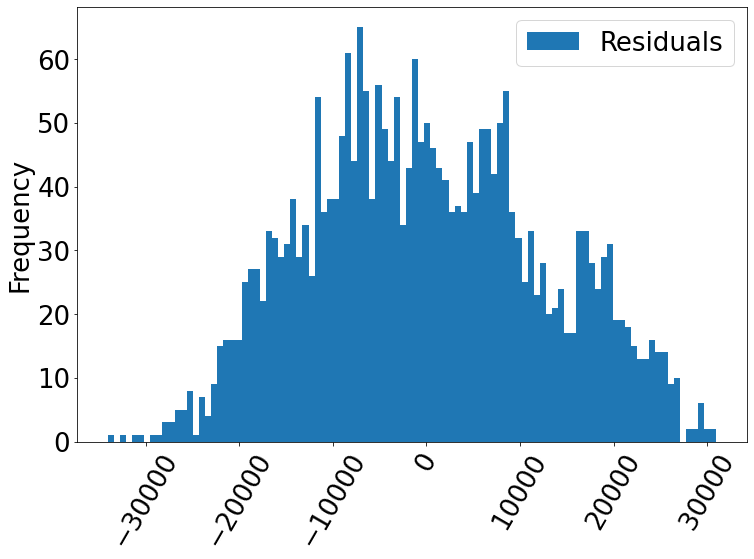

In [39]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Frequency'>

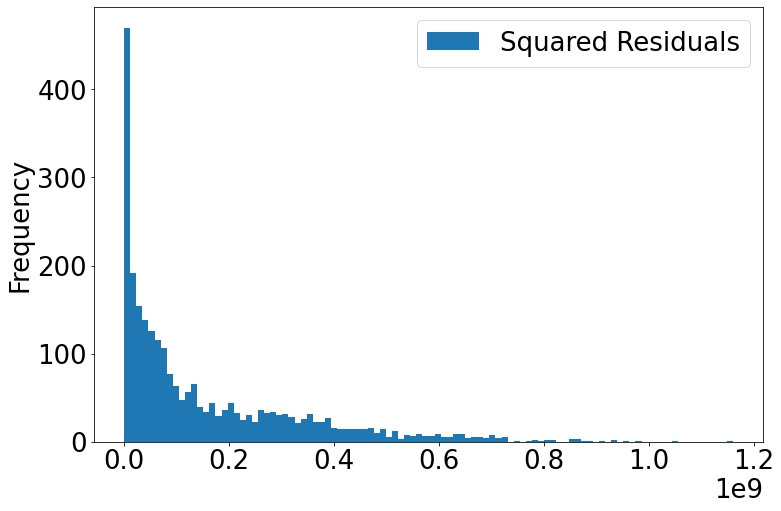

In [41]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

<ipython-input-43-dbde2fe7e653>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


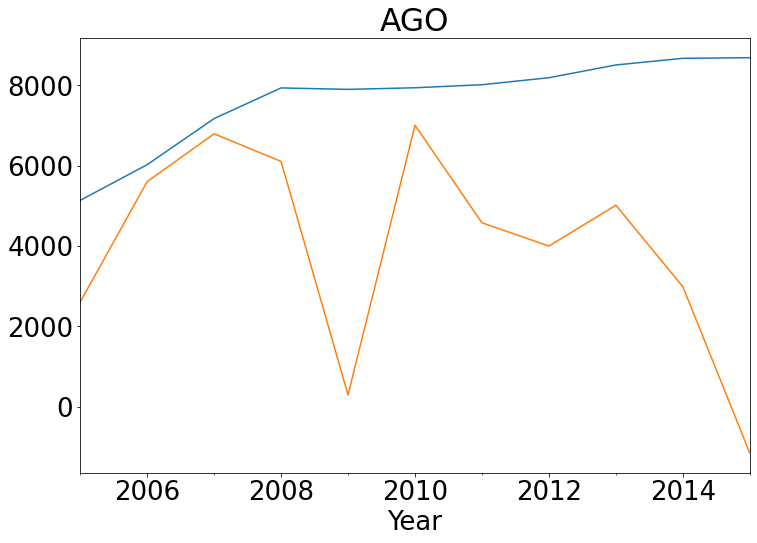

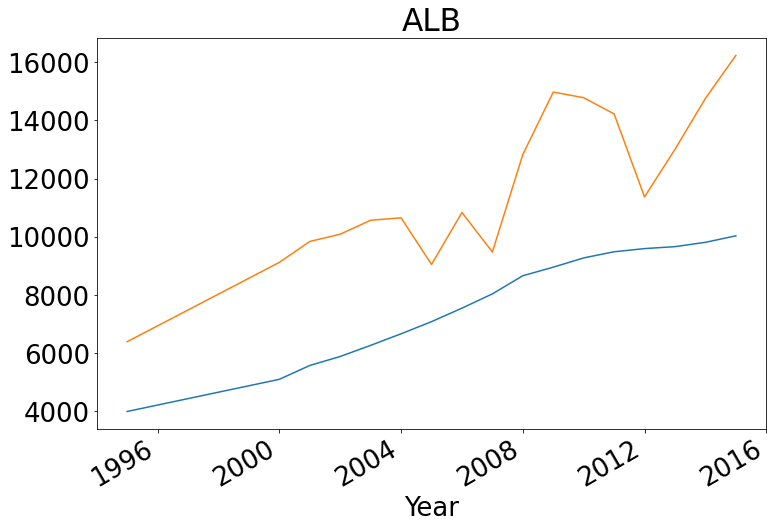

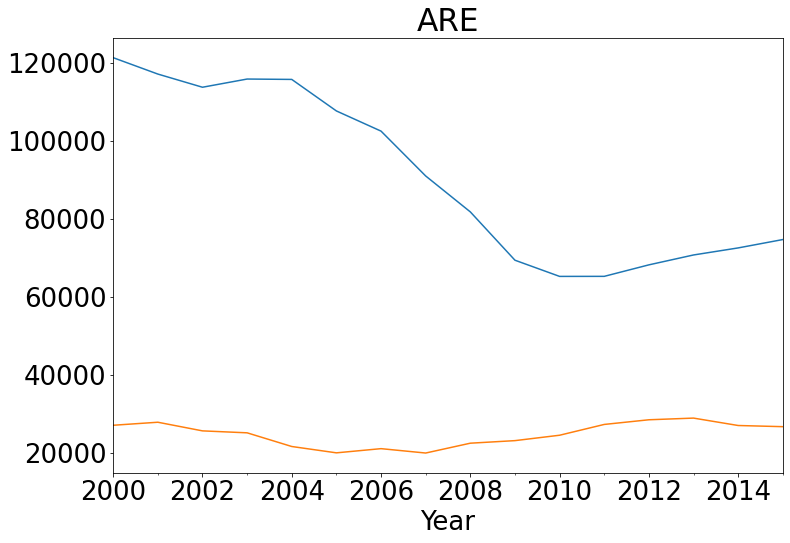

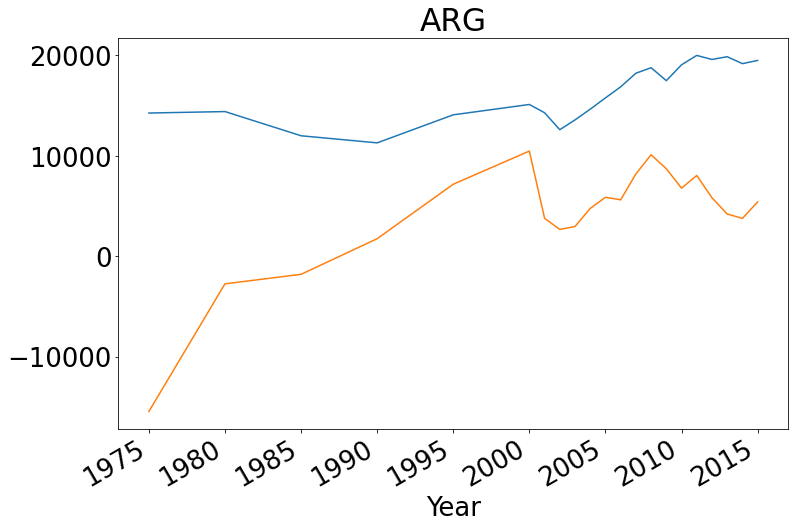

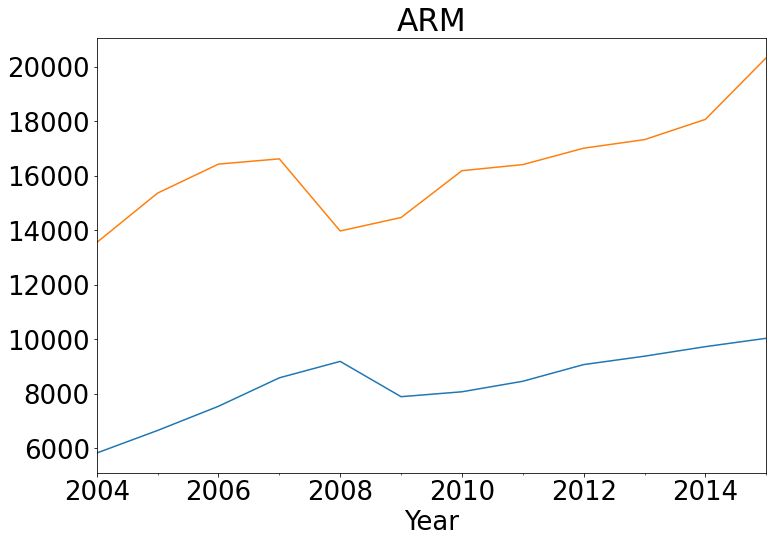

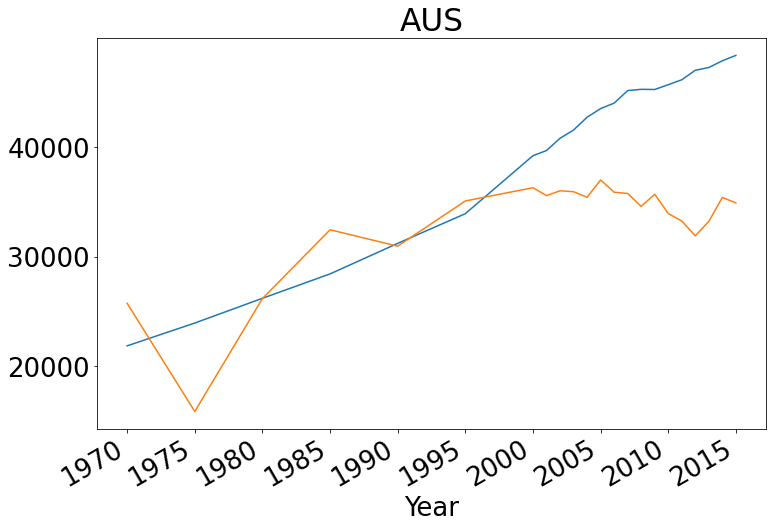

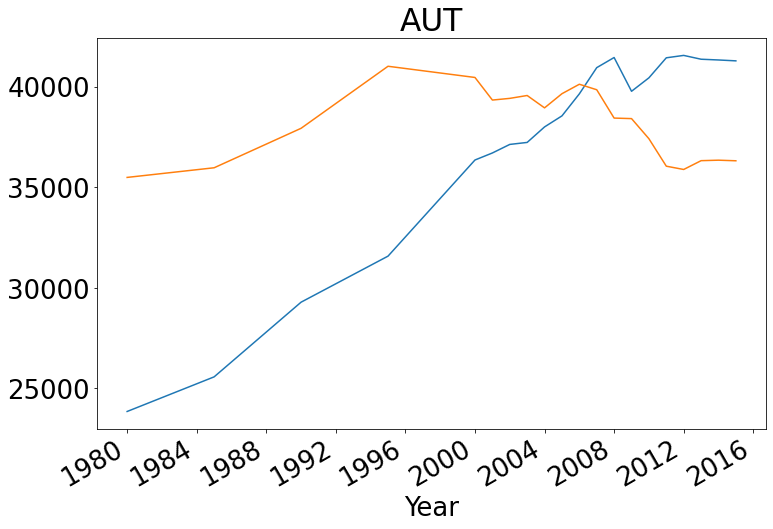

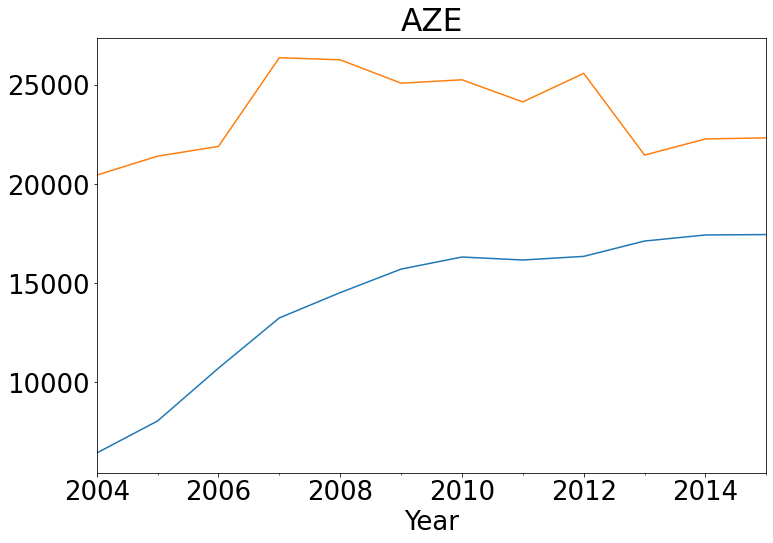

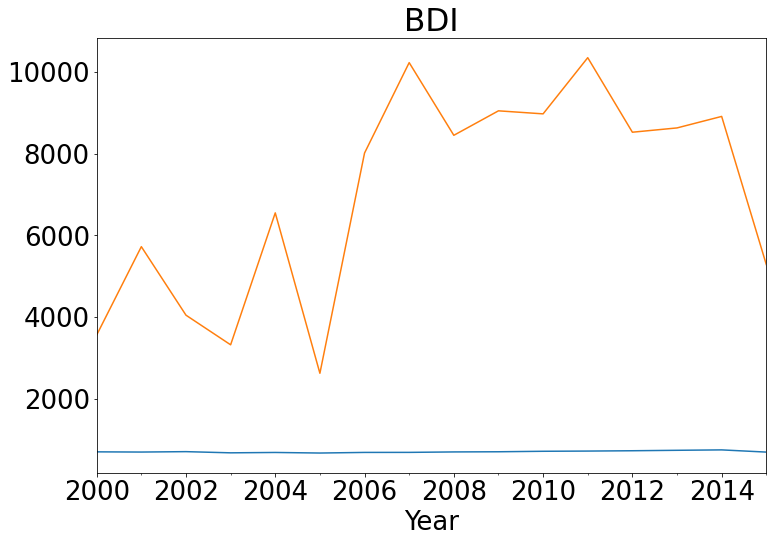

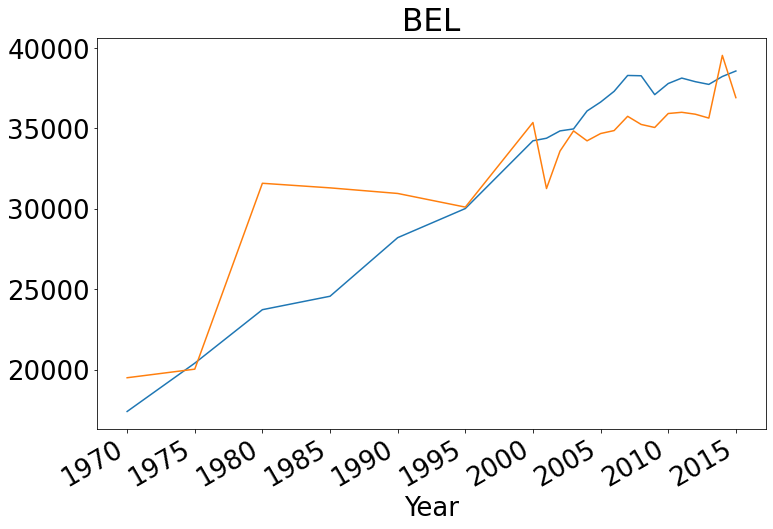

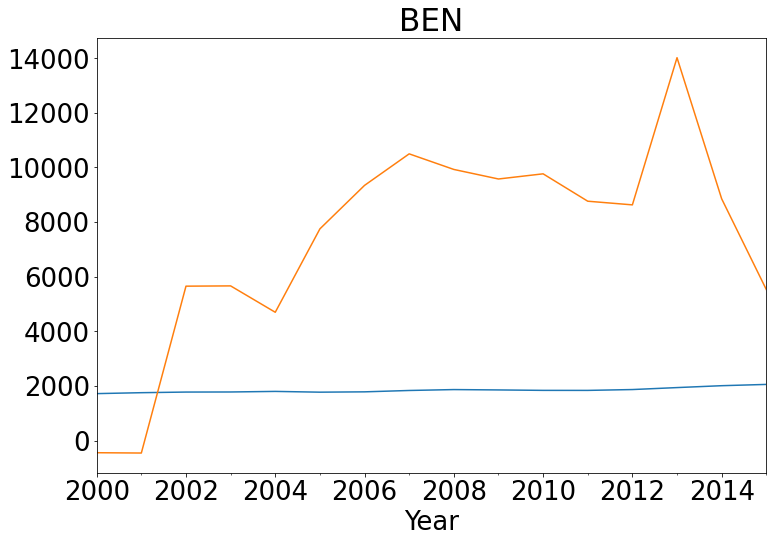

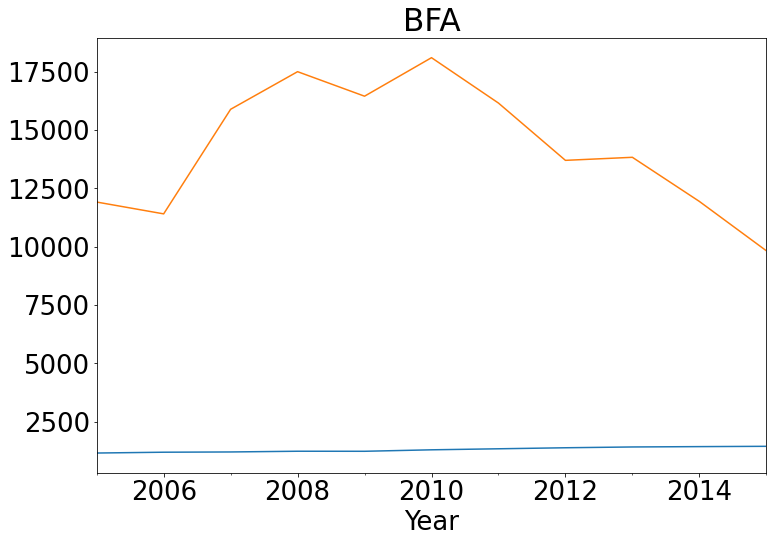

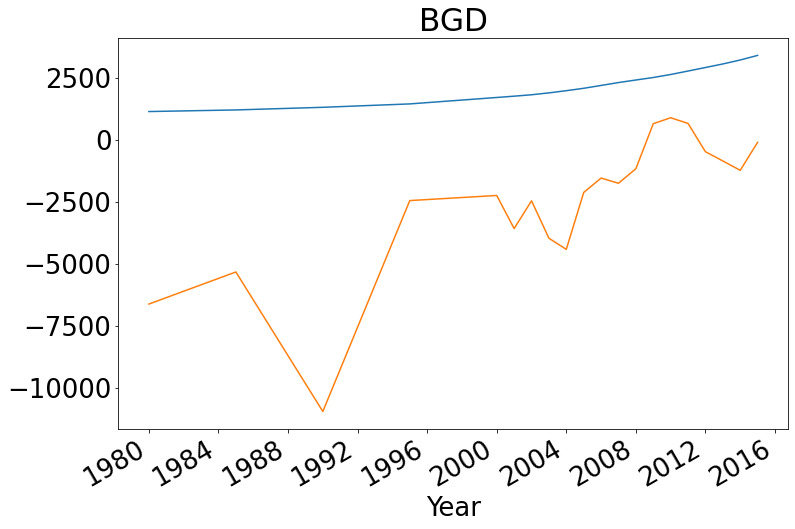

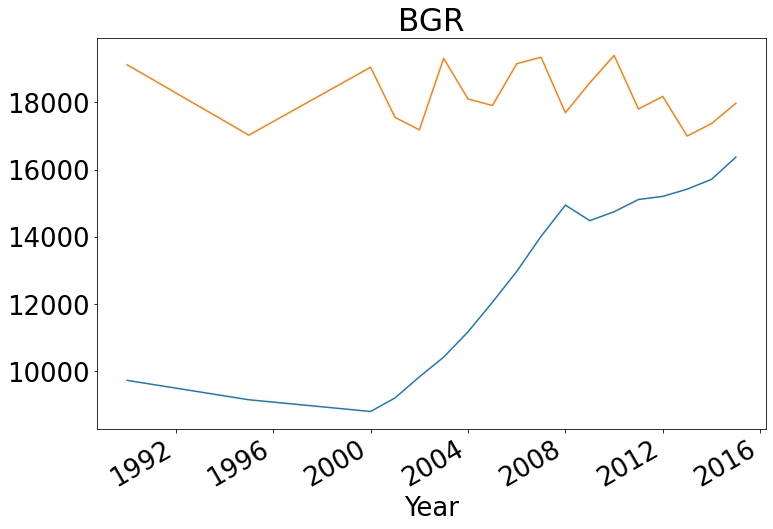

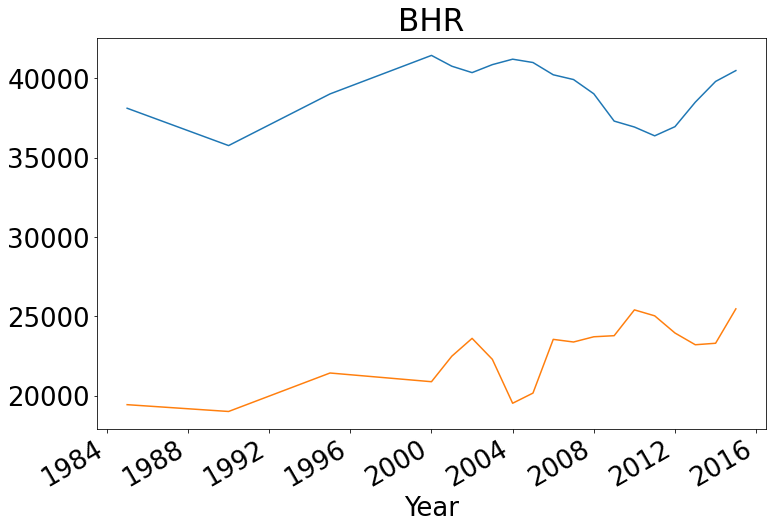

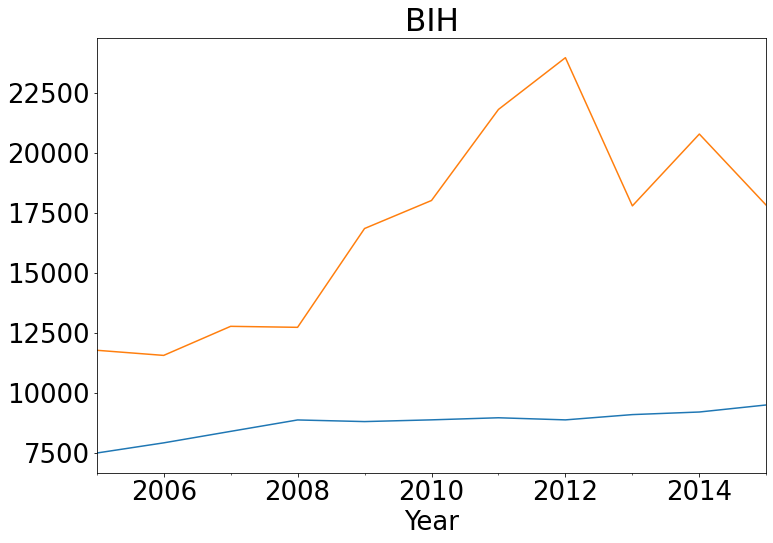

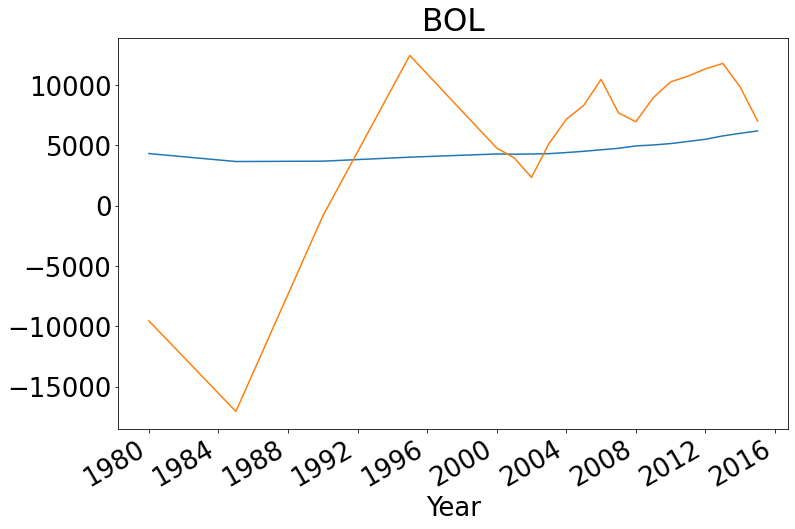

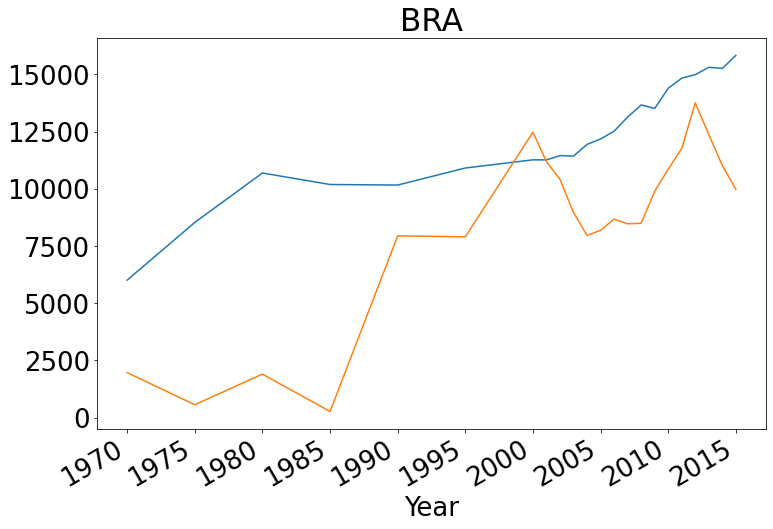

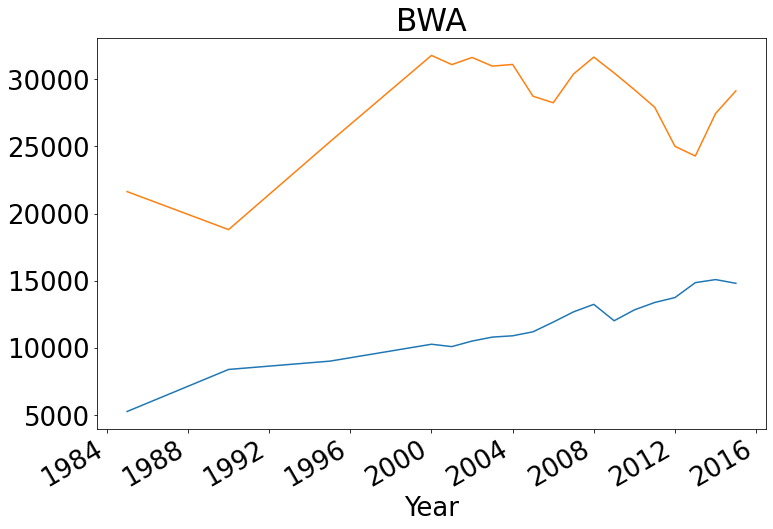

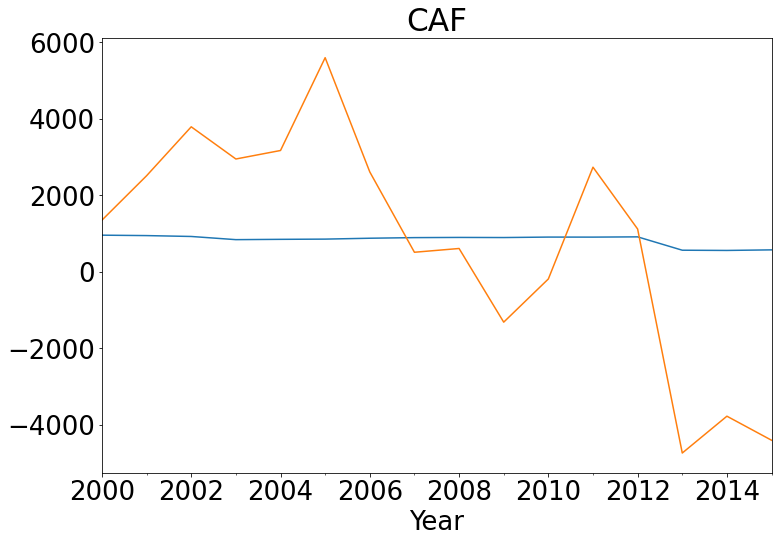

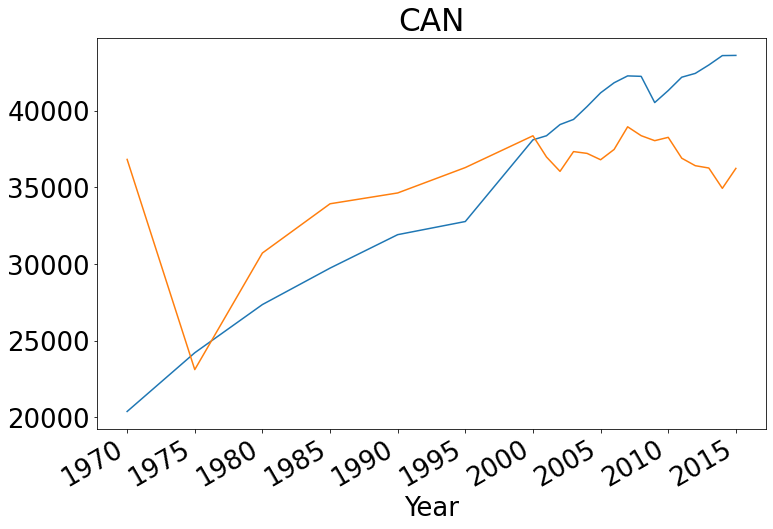

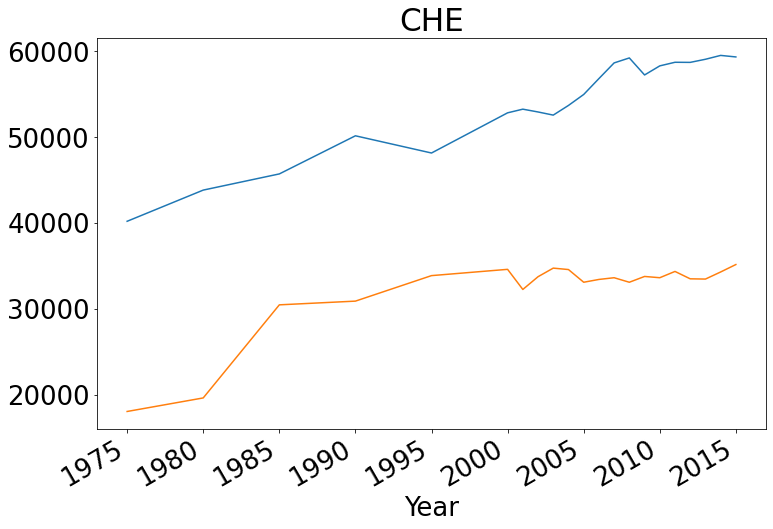

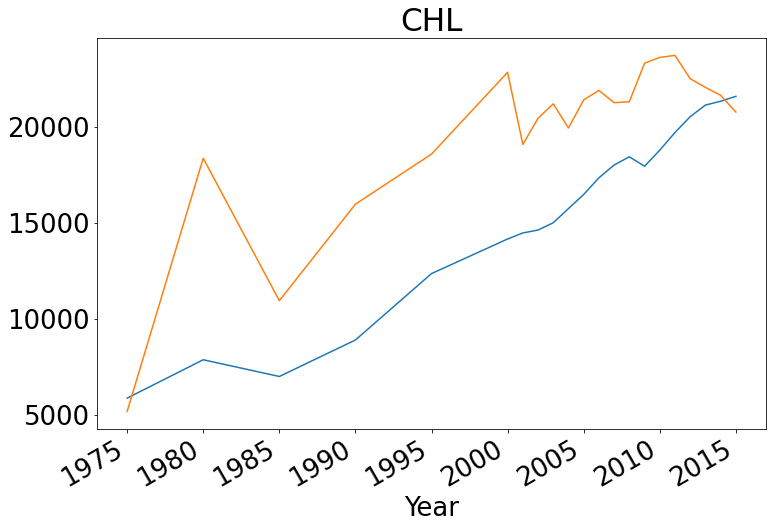

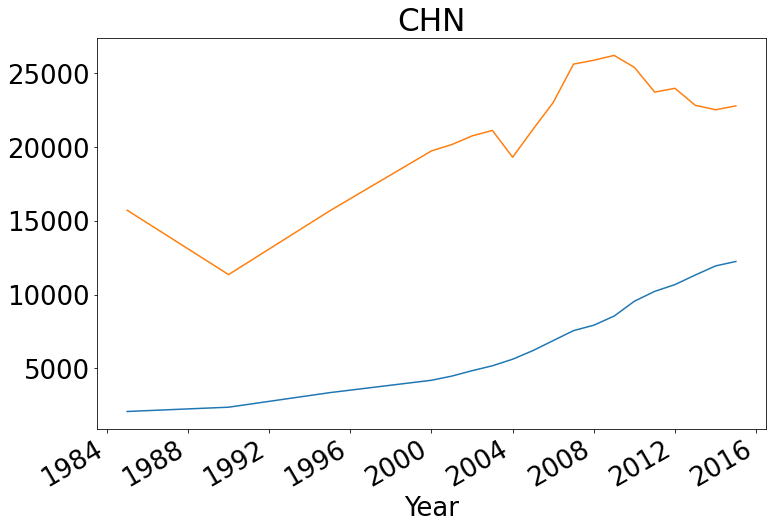

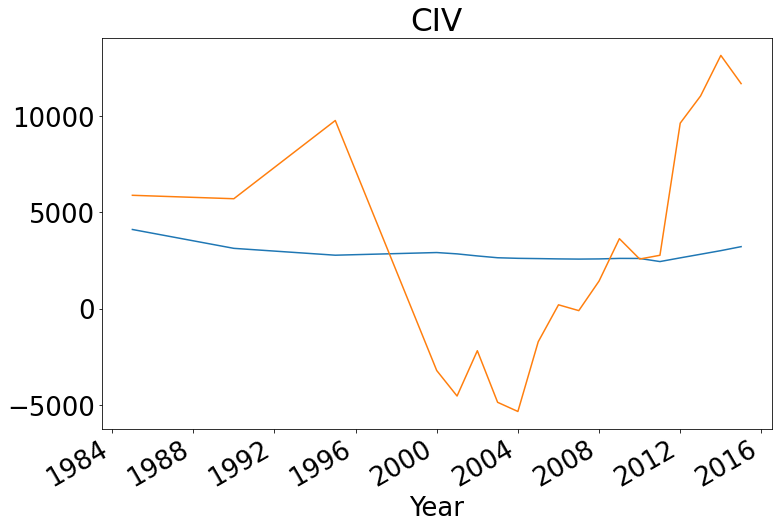

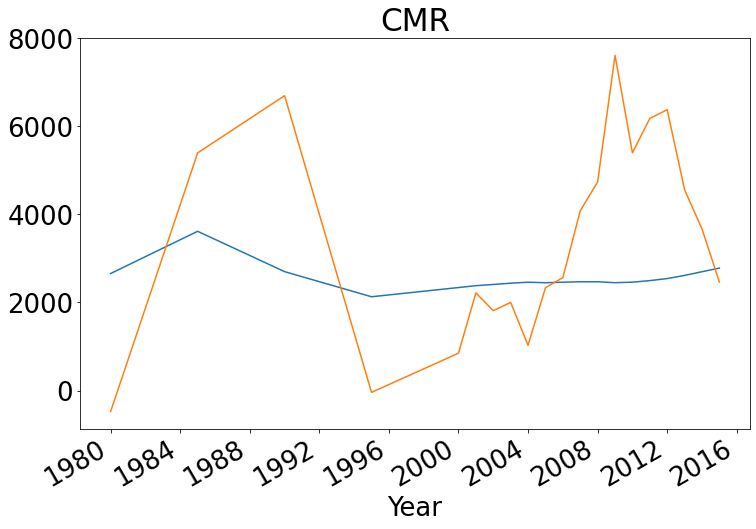

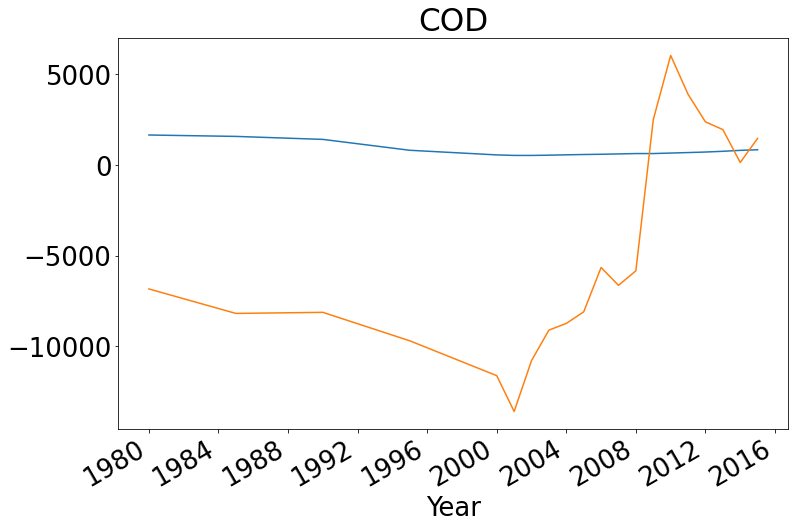

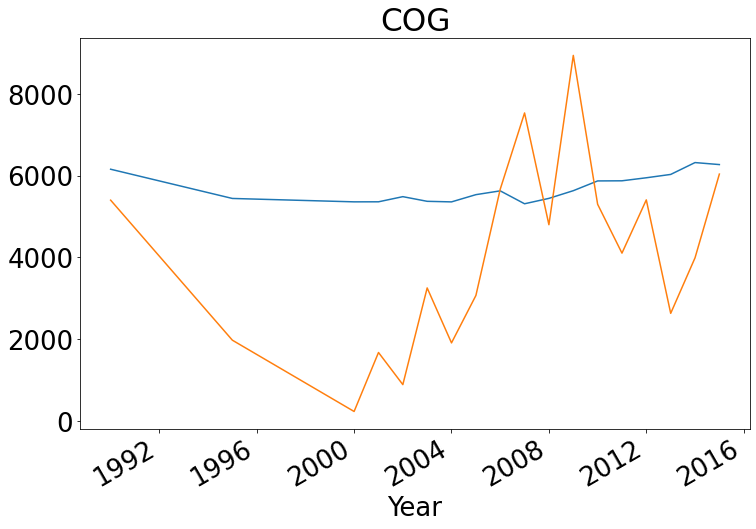

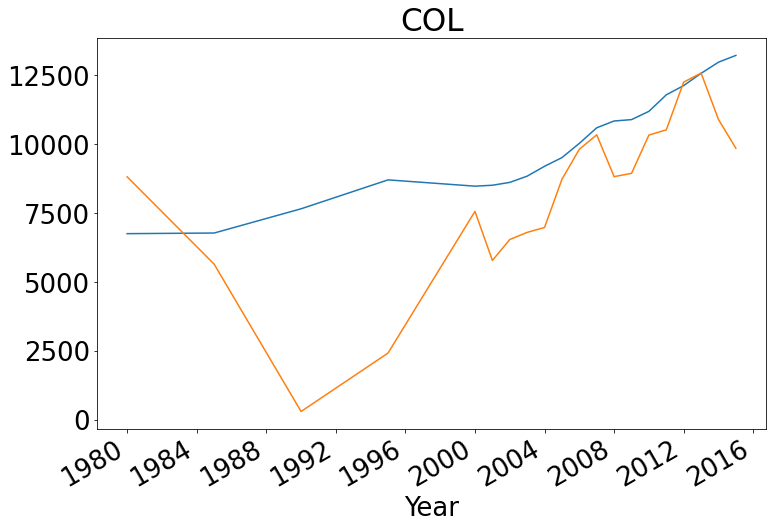

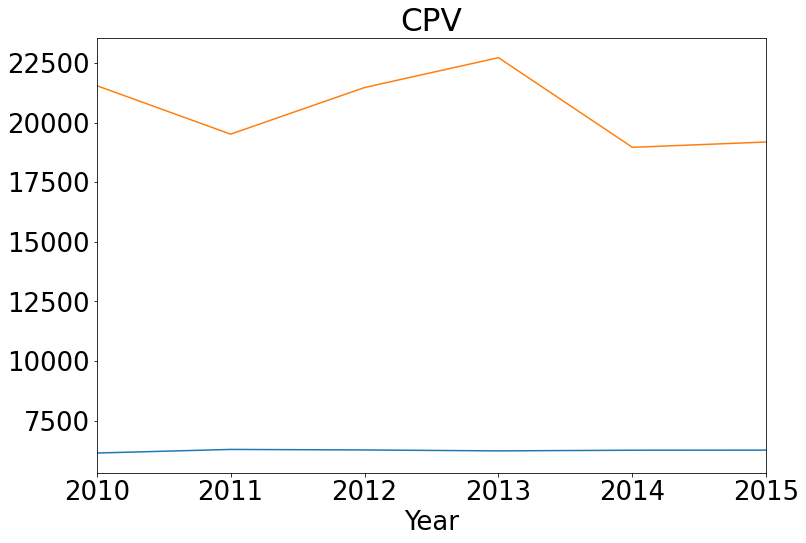

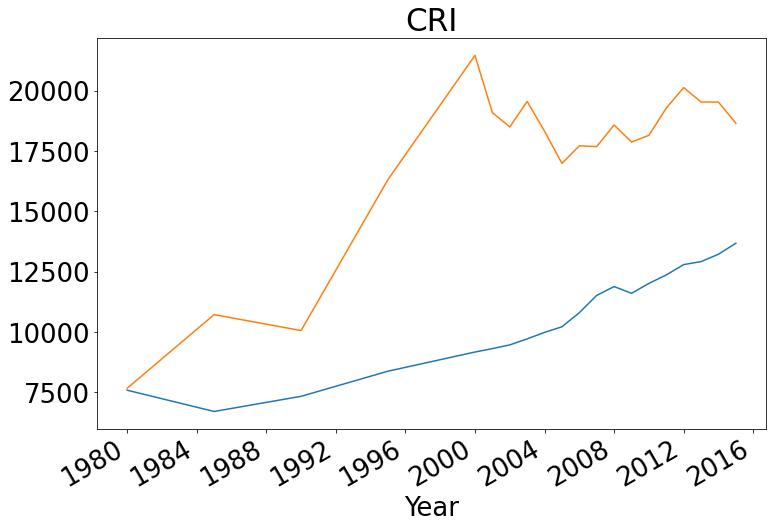

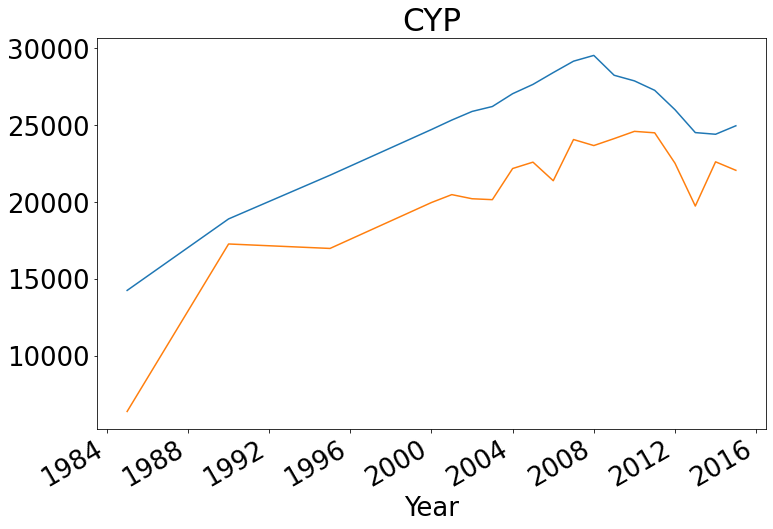

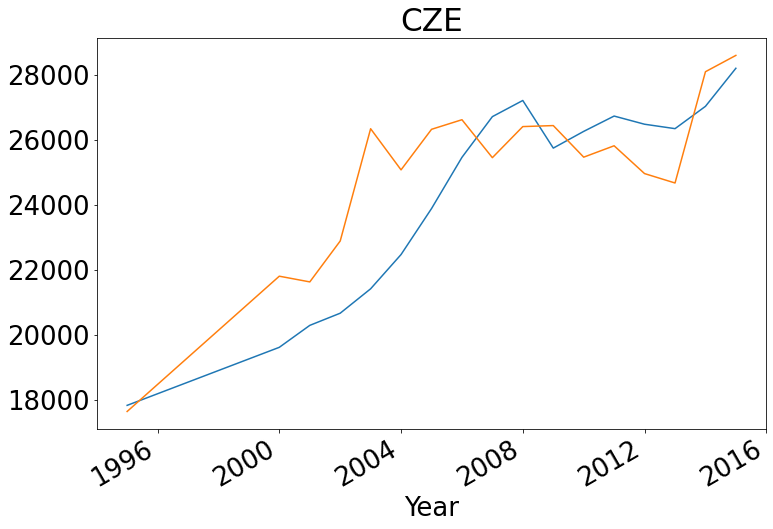

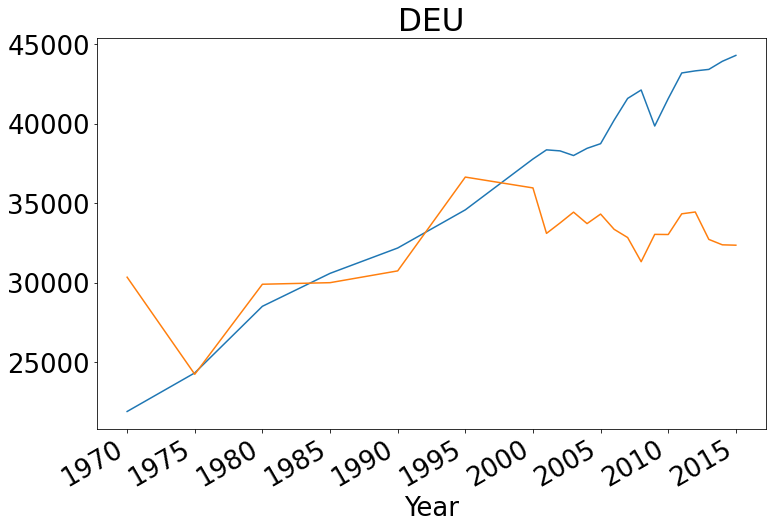

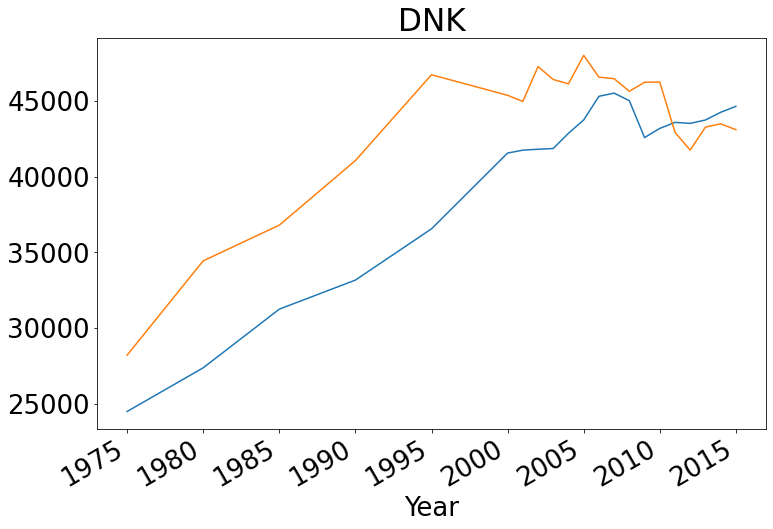

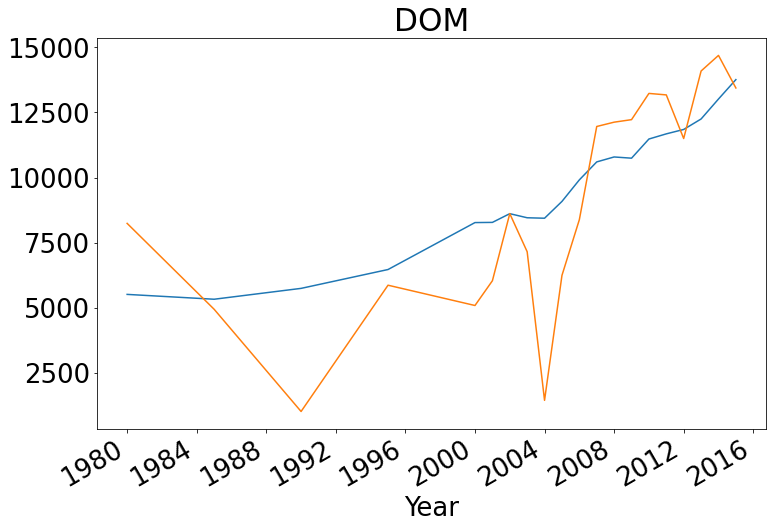

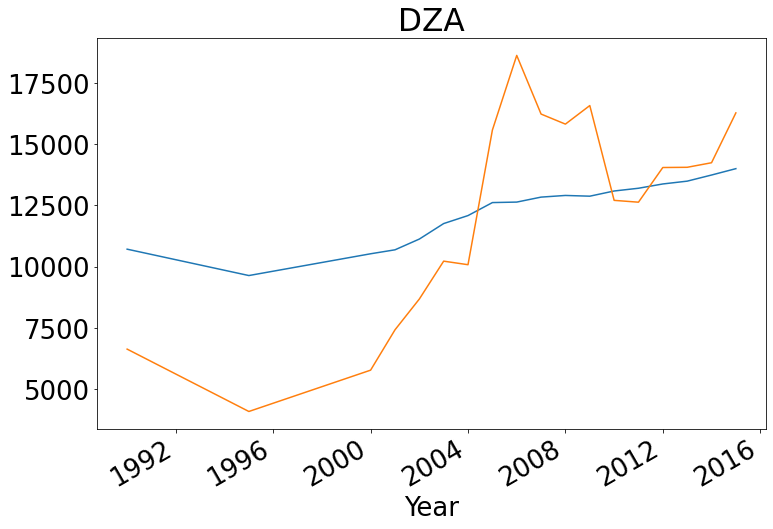

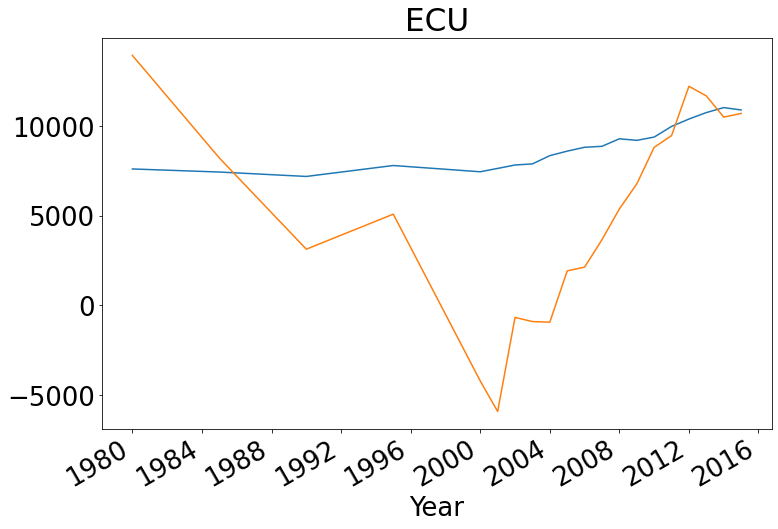

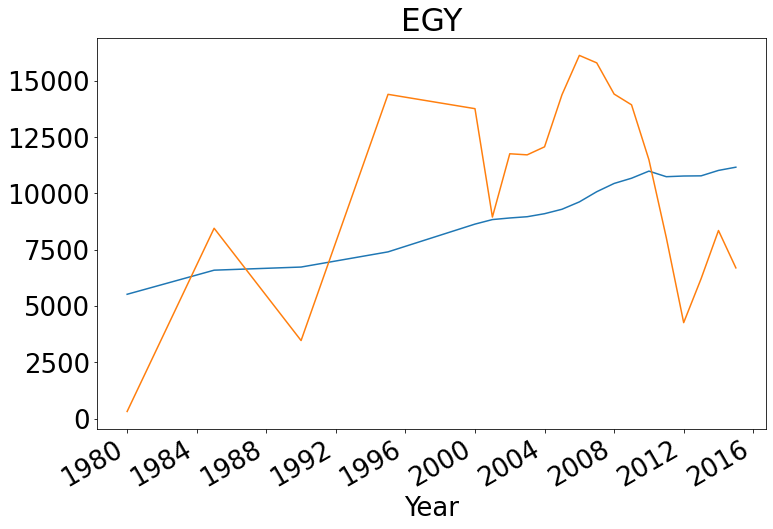

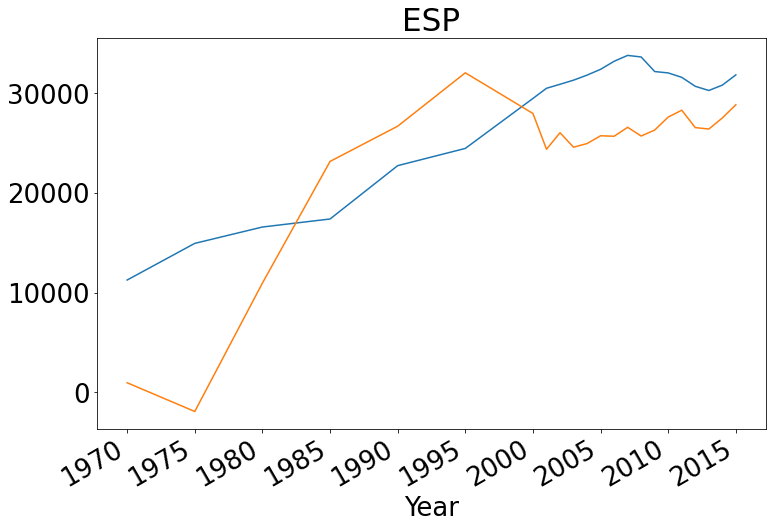

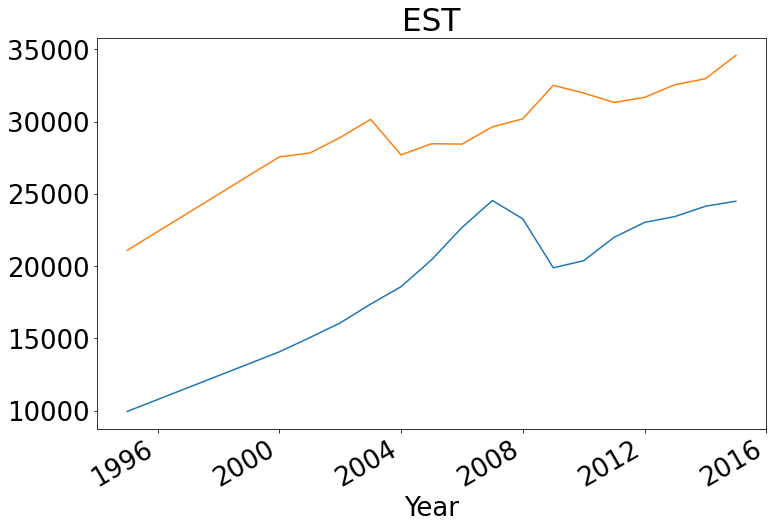

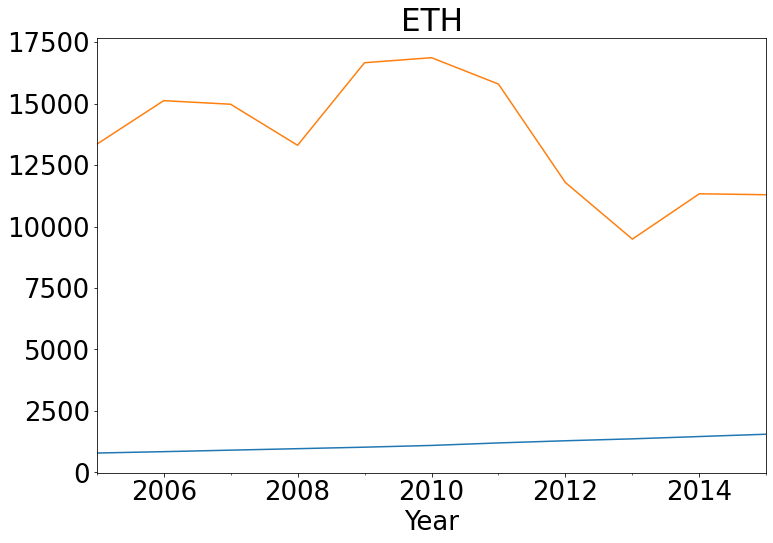

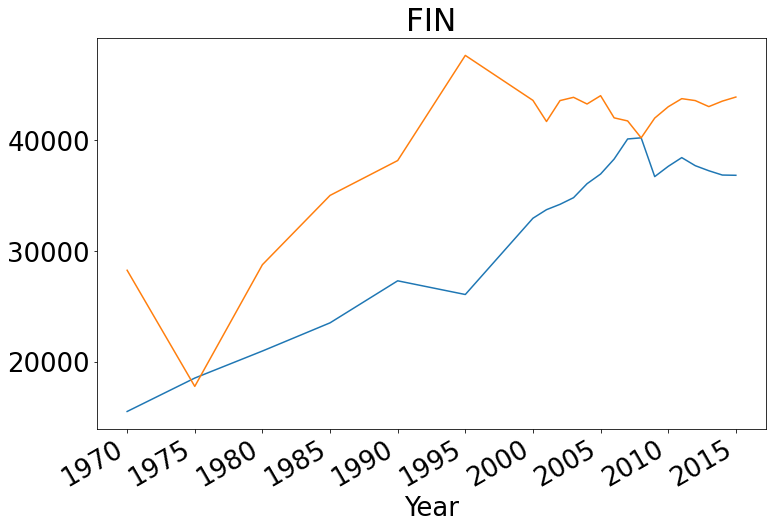

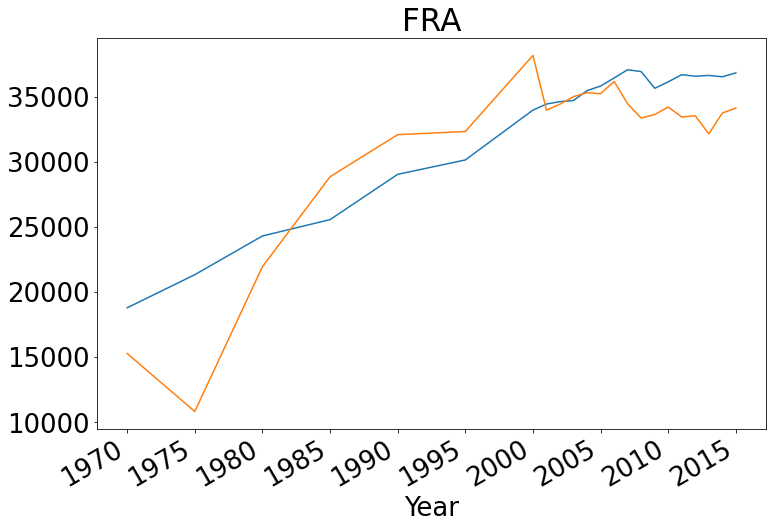

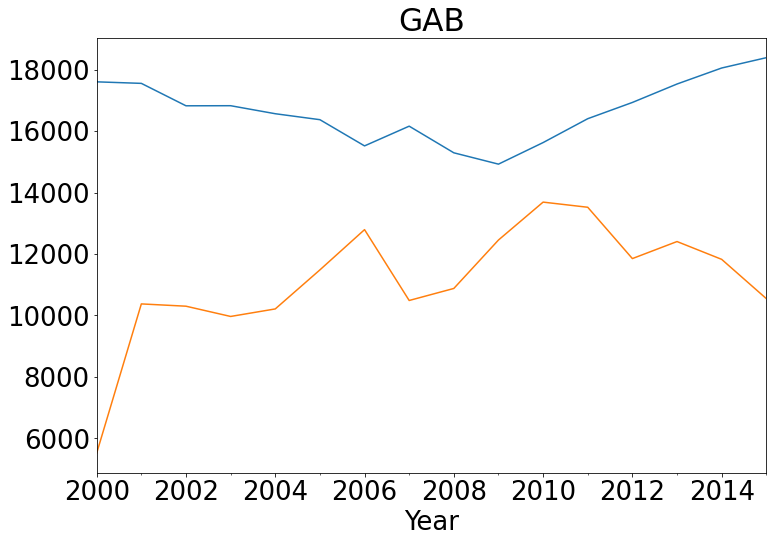

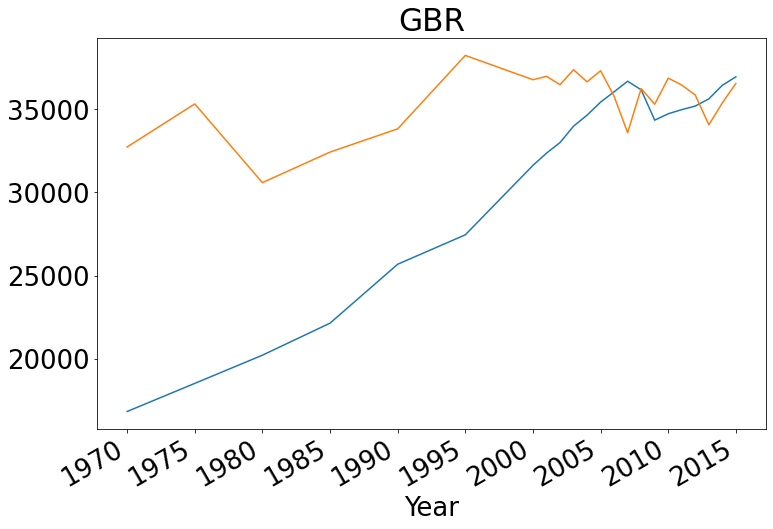

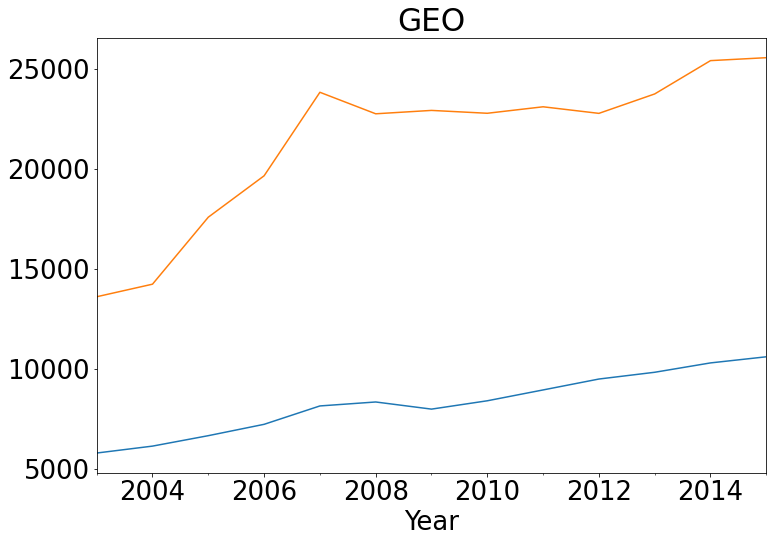

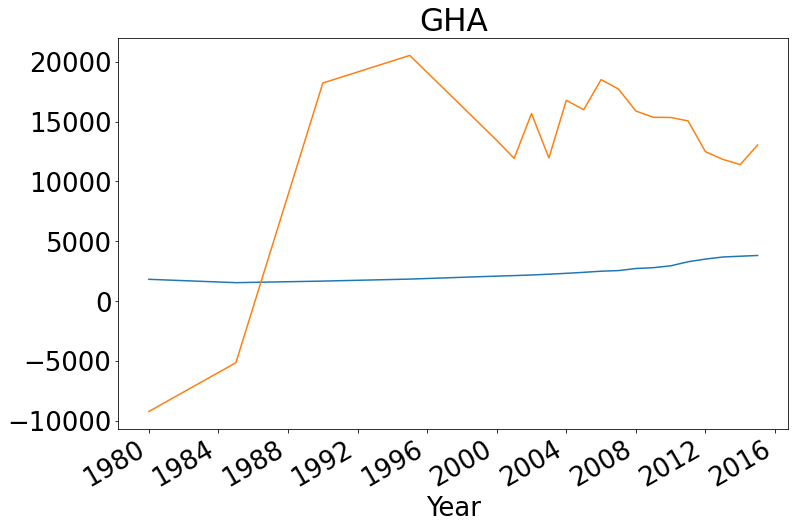

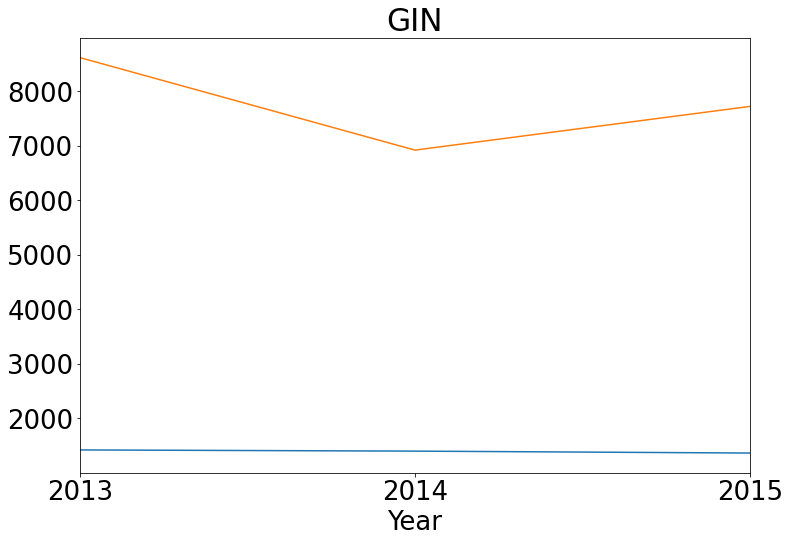

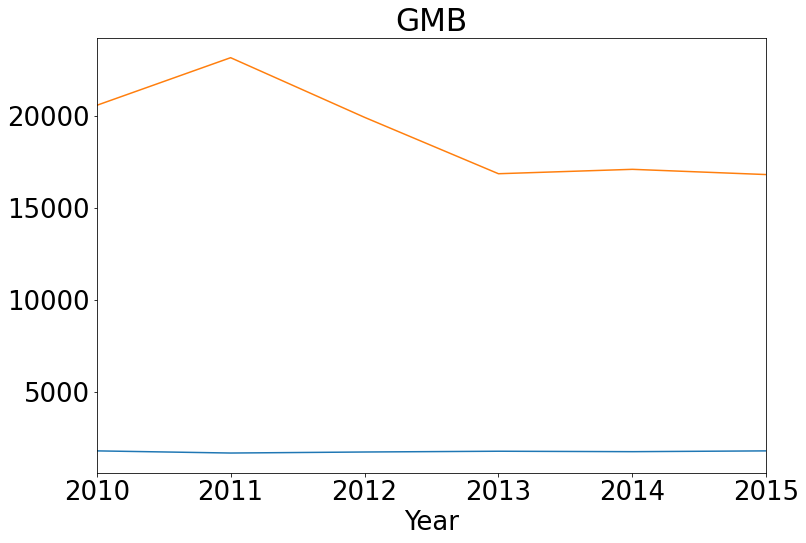

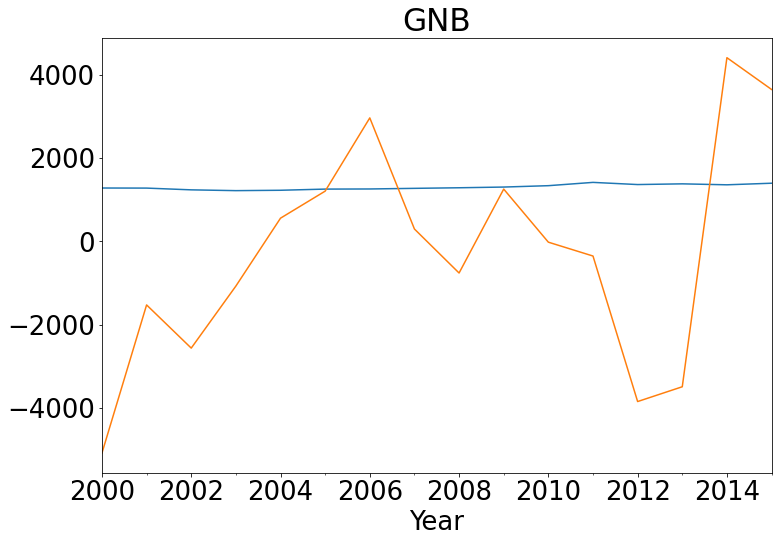

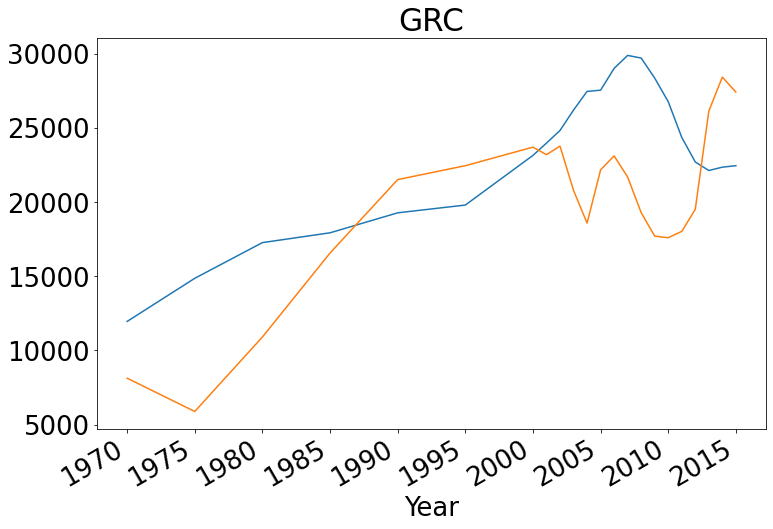

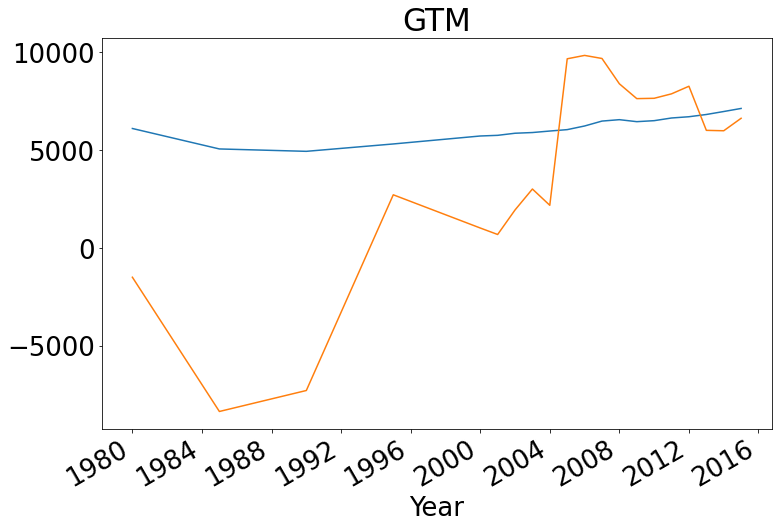

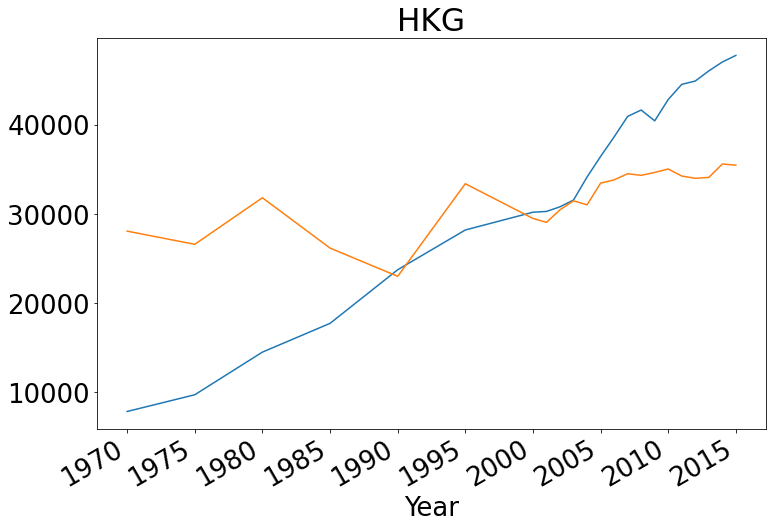

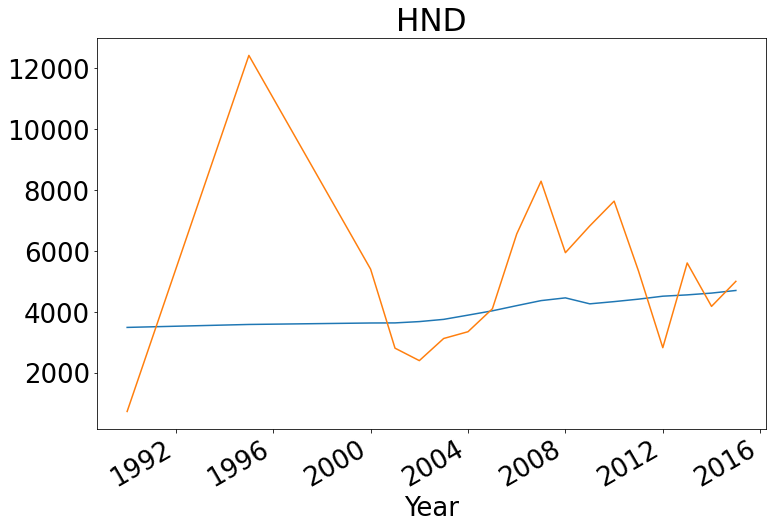

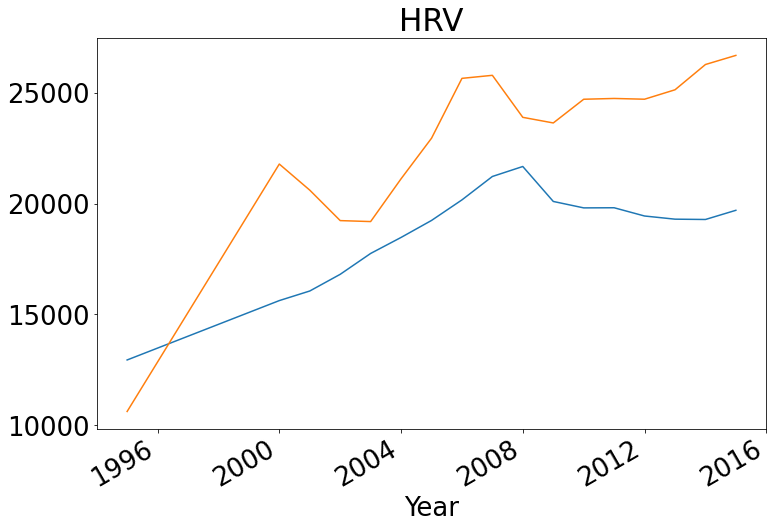

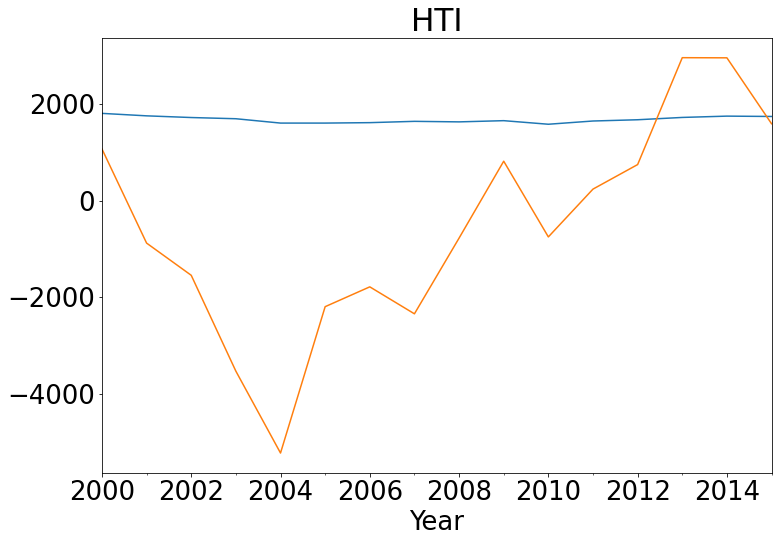

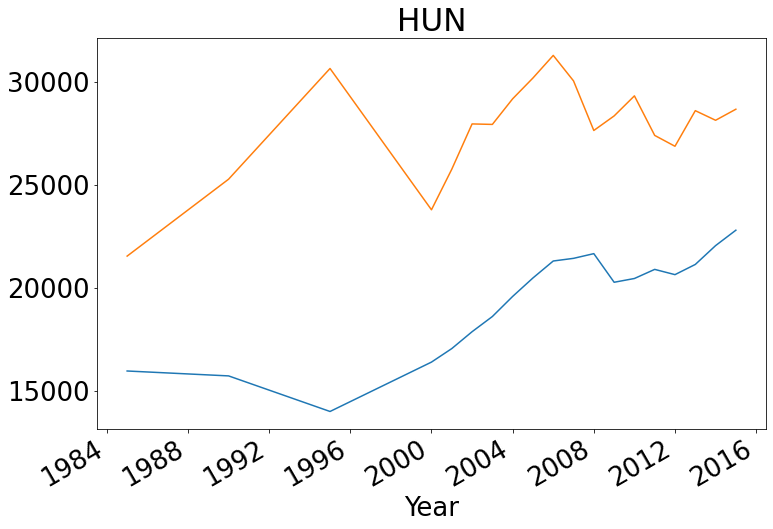

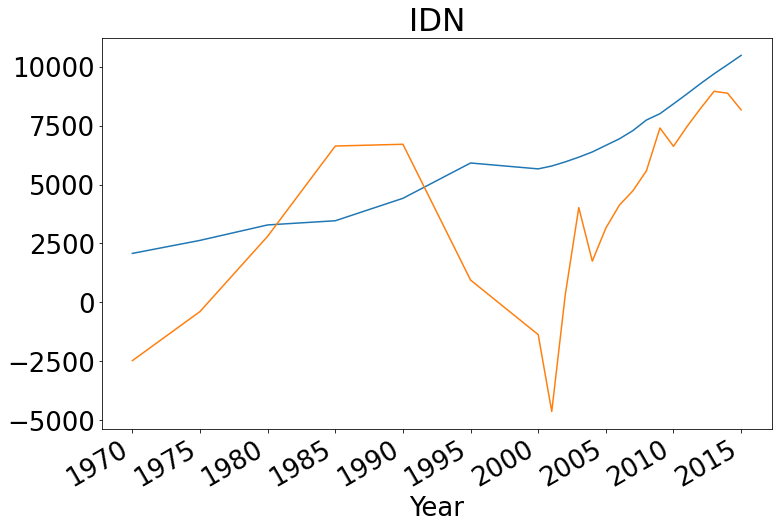

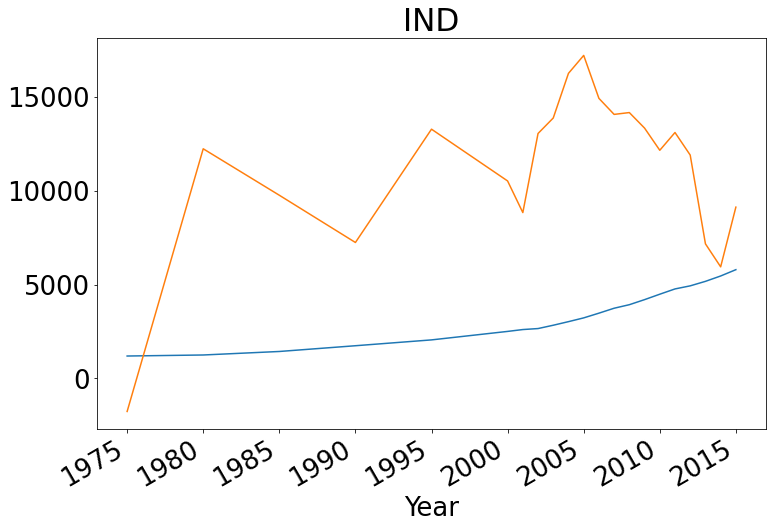

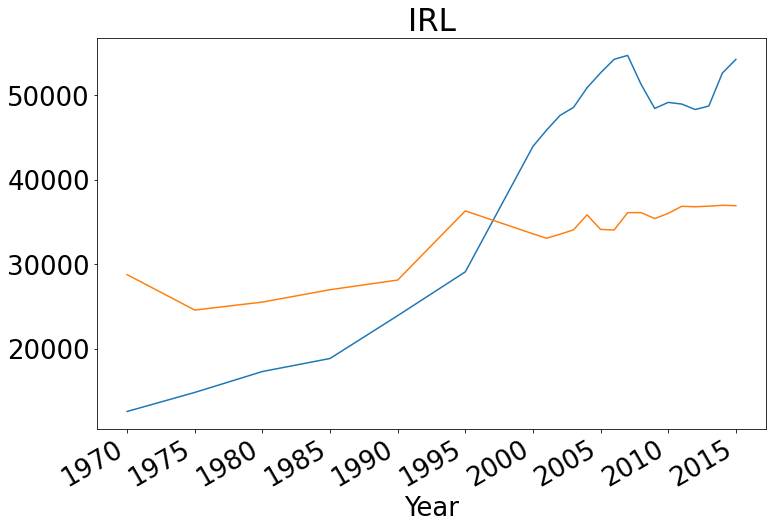

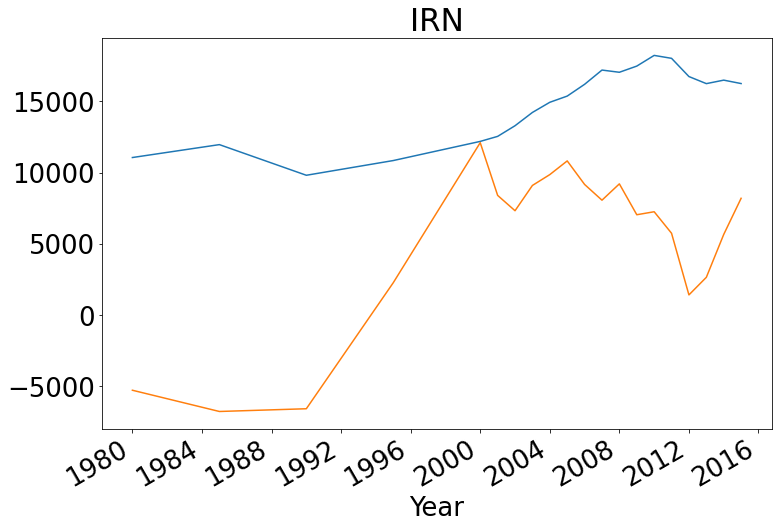

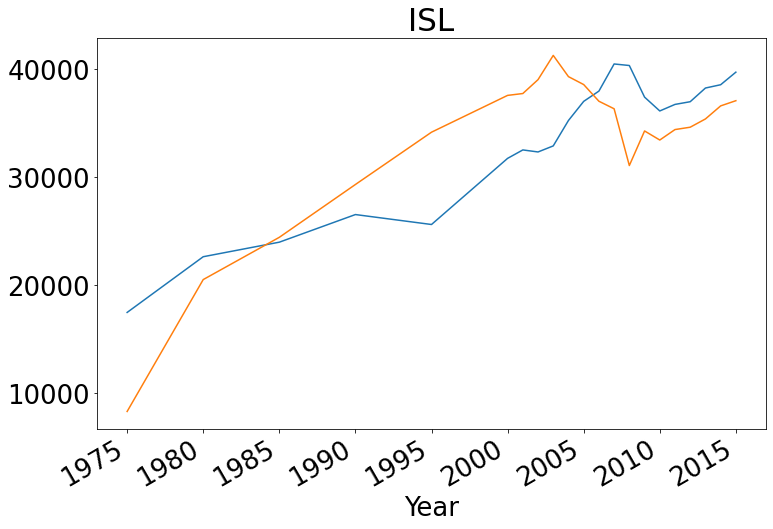

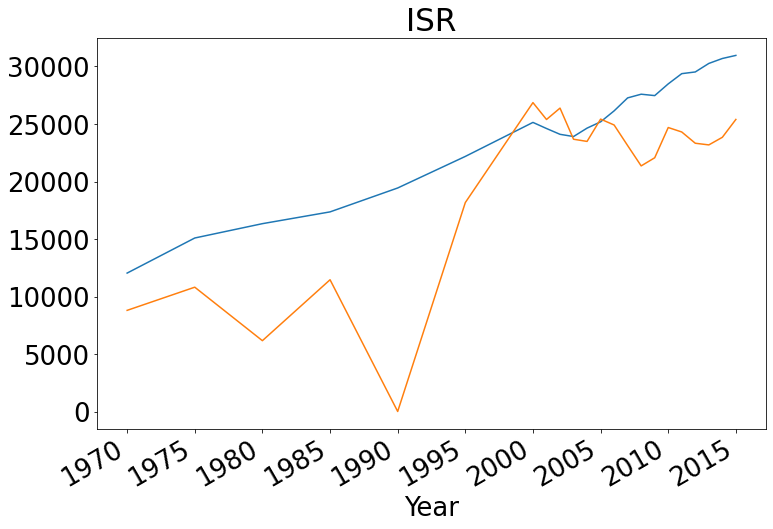

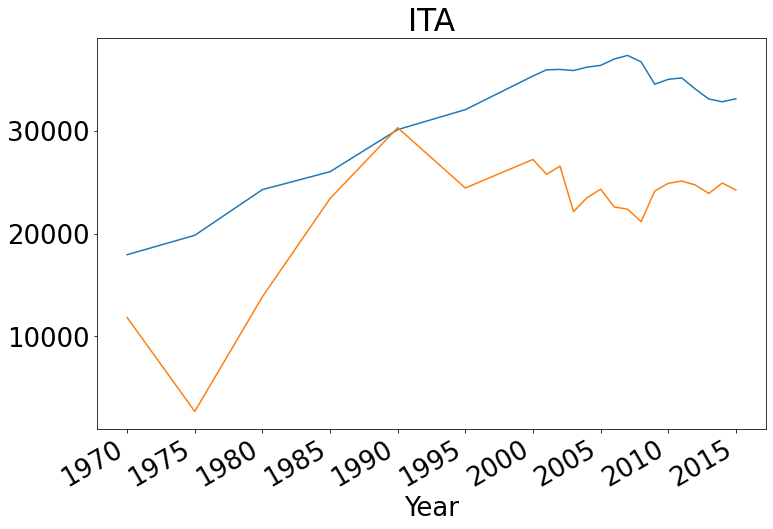

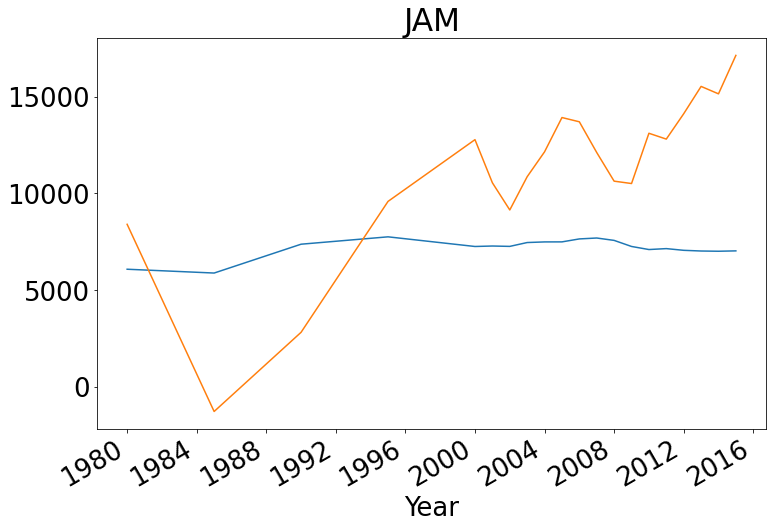

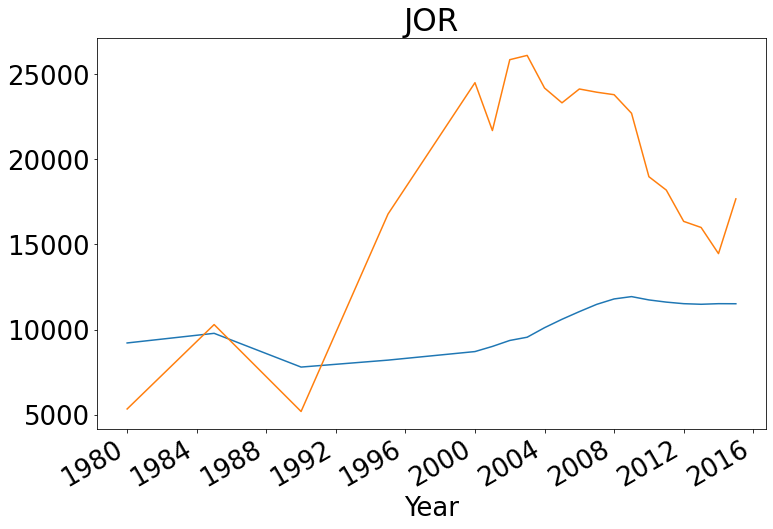

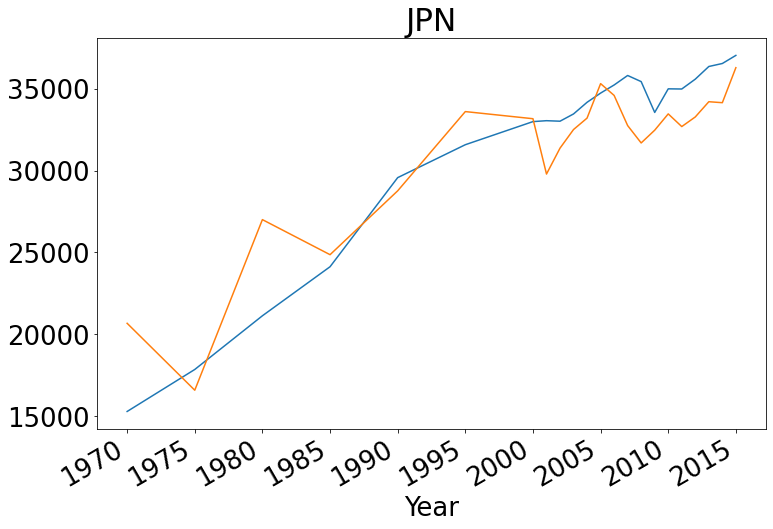

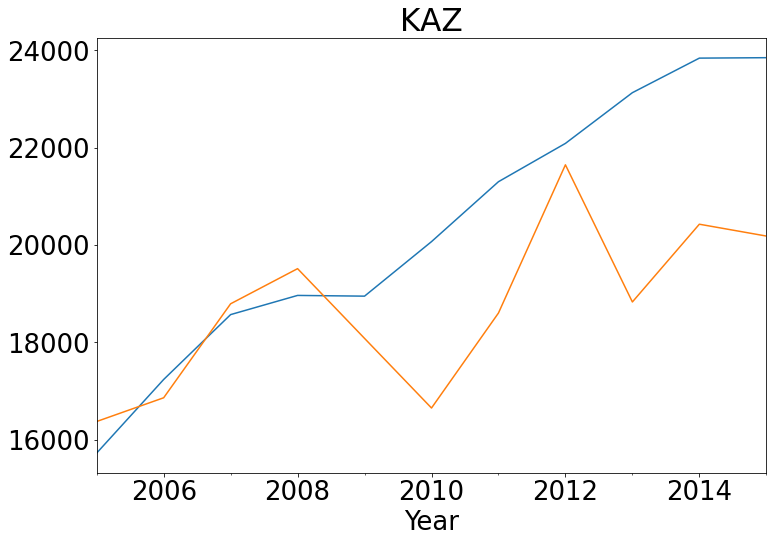

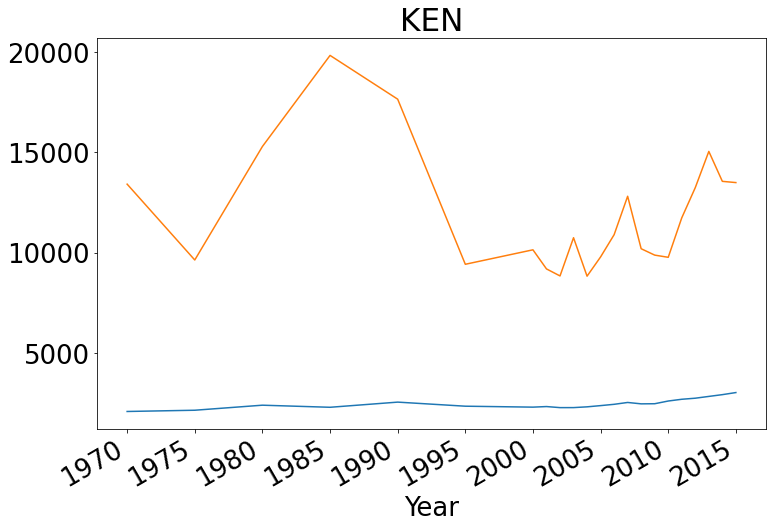

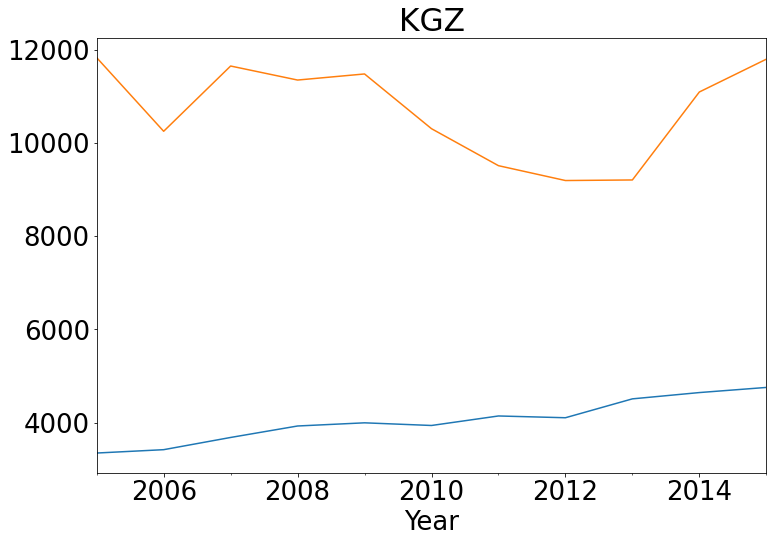

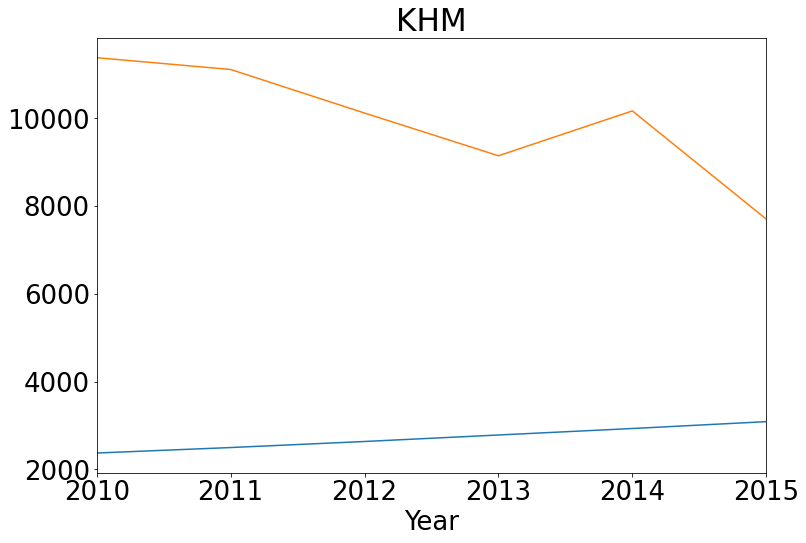

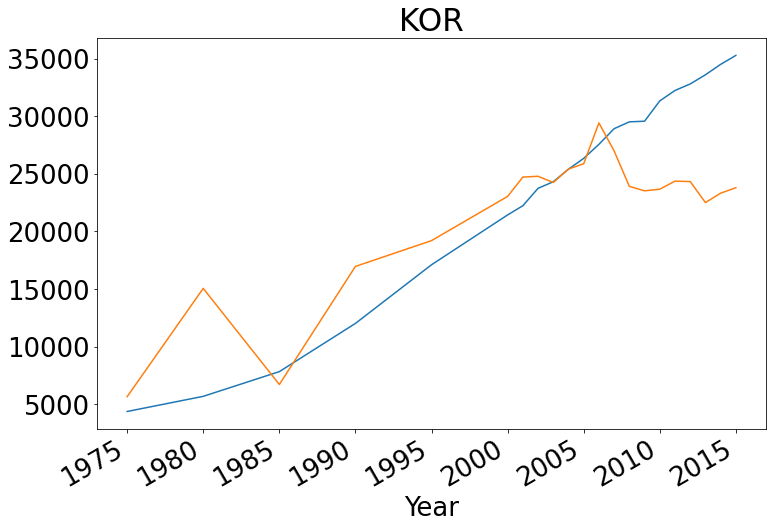

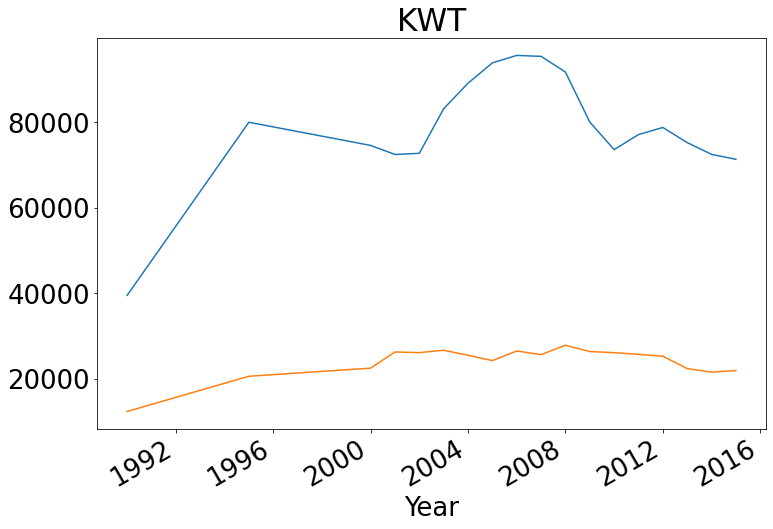

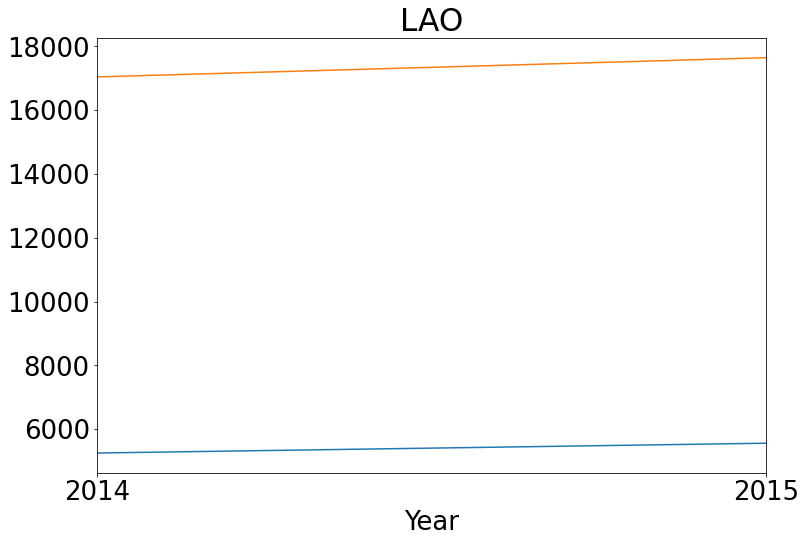

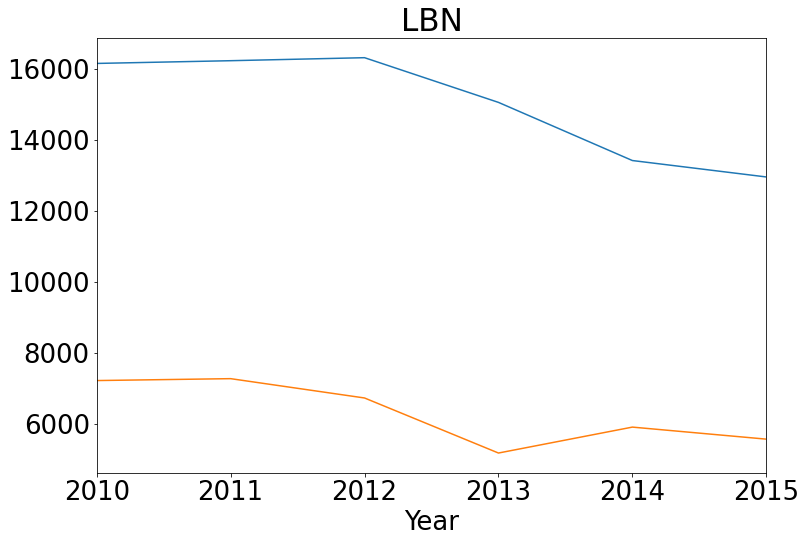

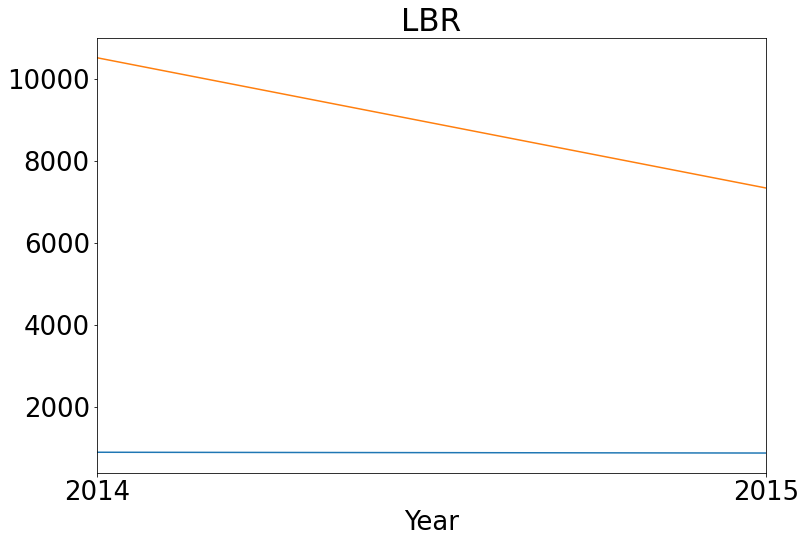

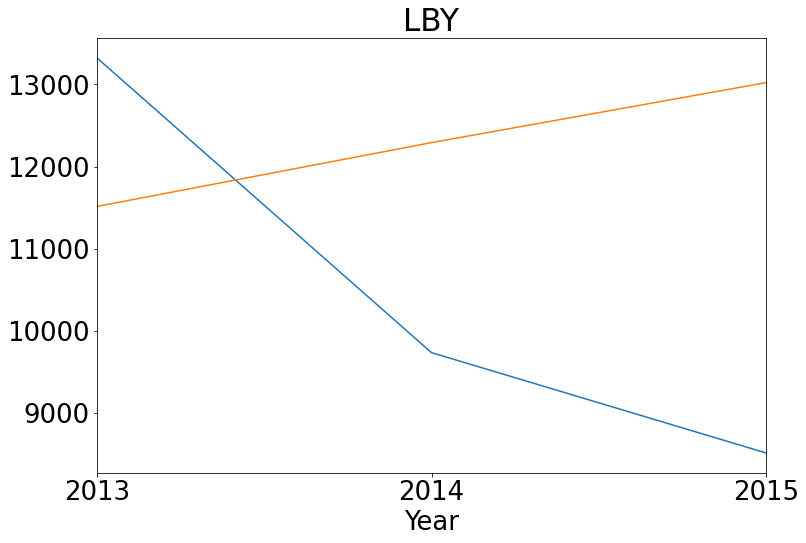

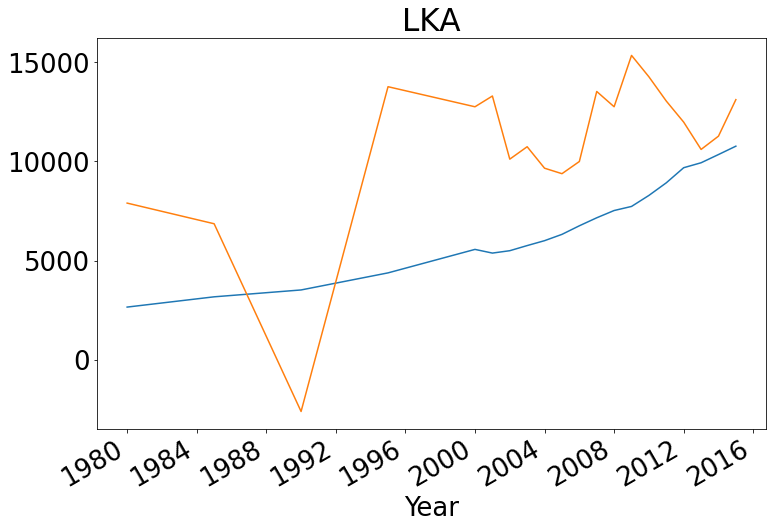

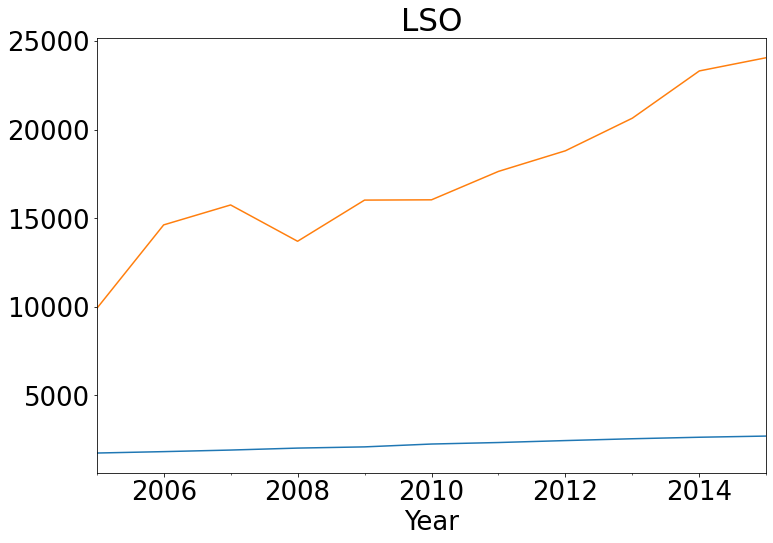

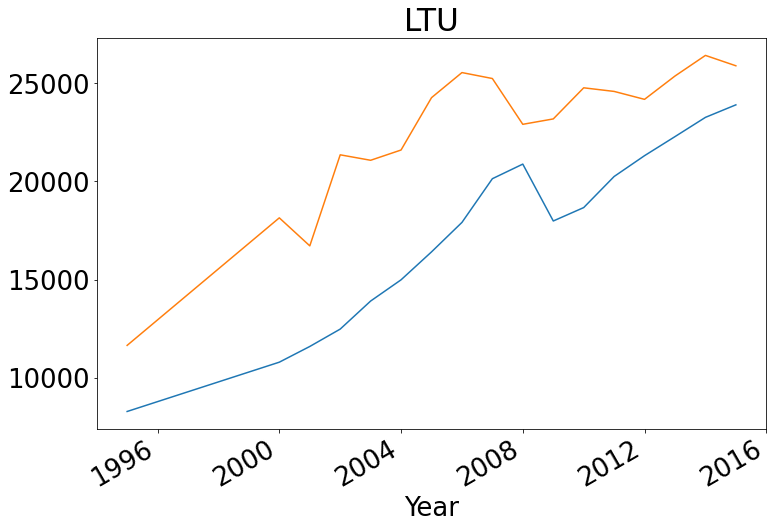

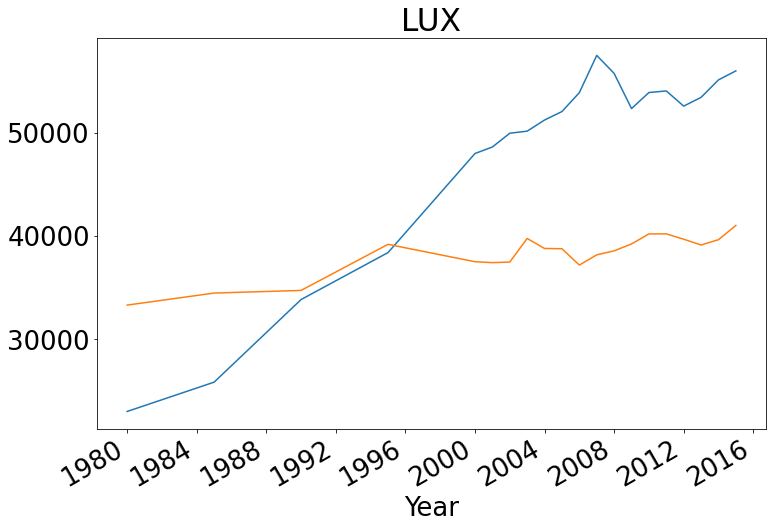

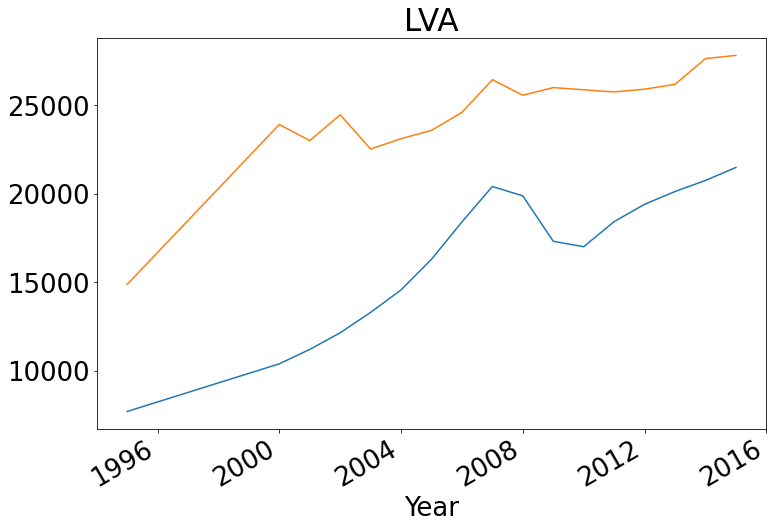

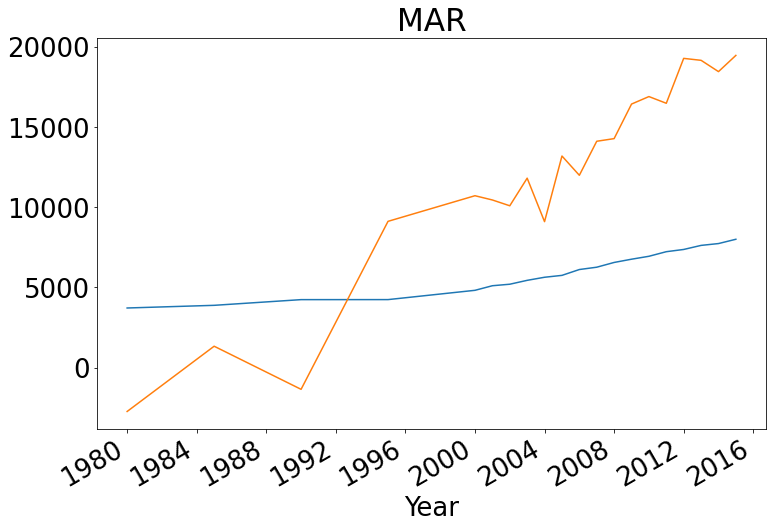

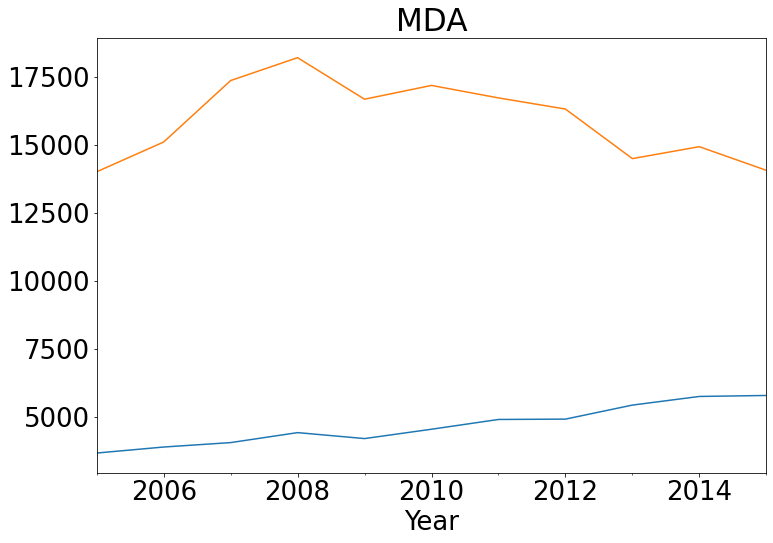

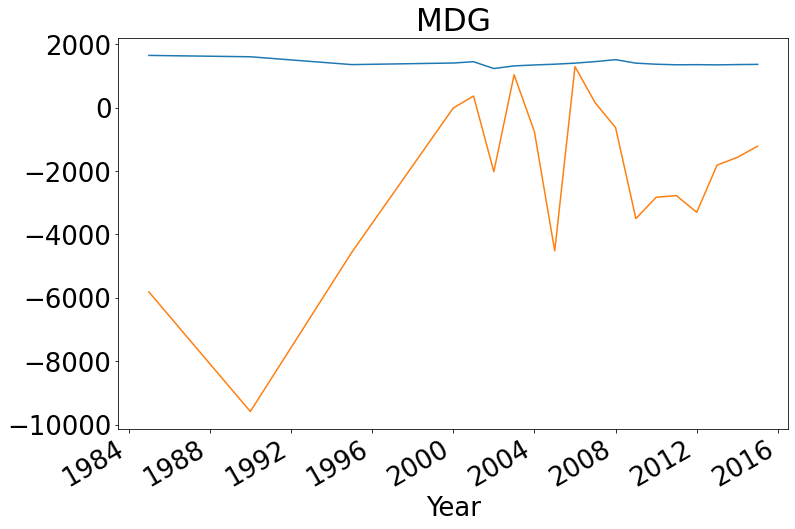

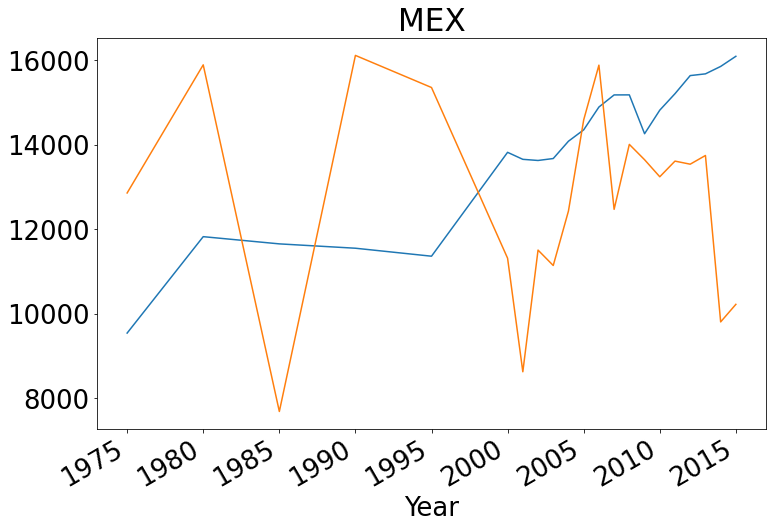

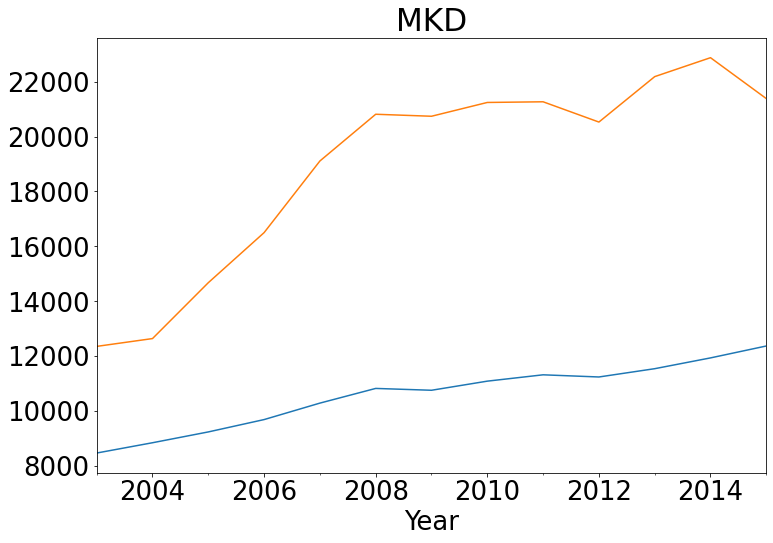

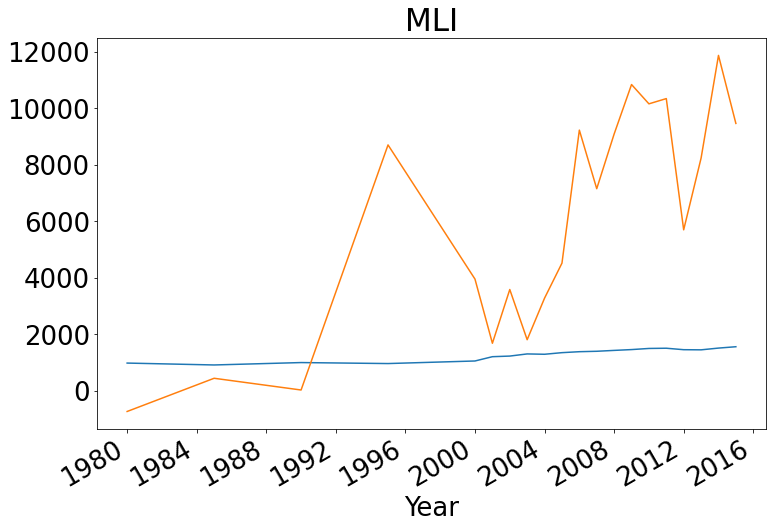

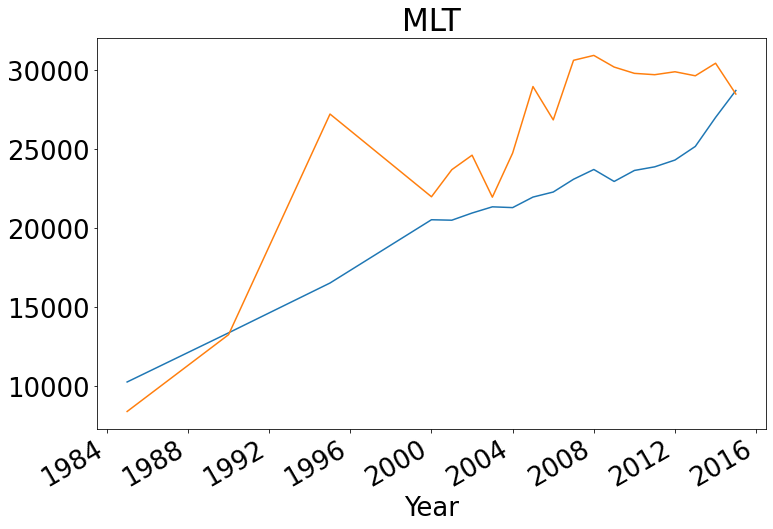

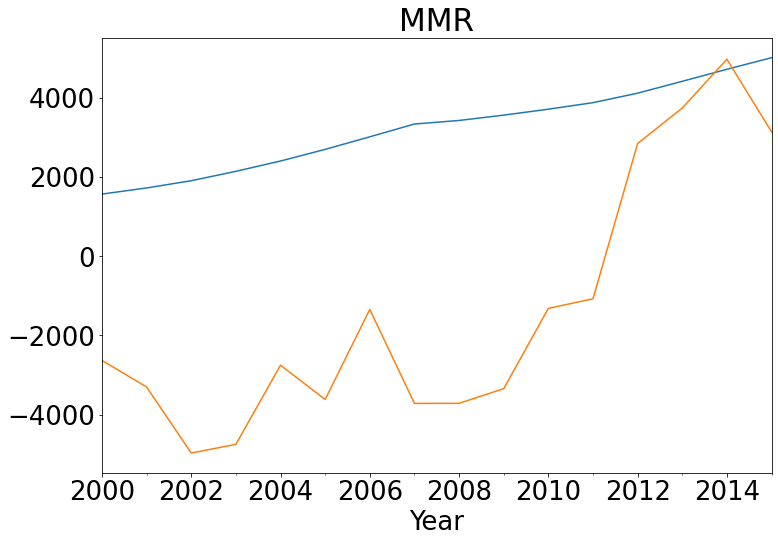

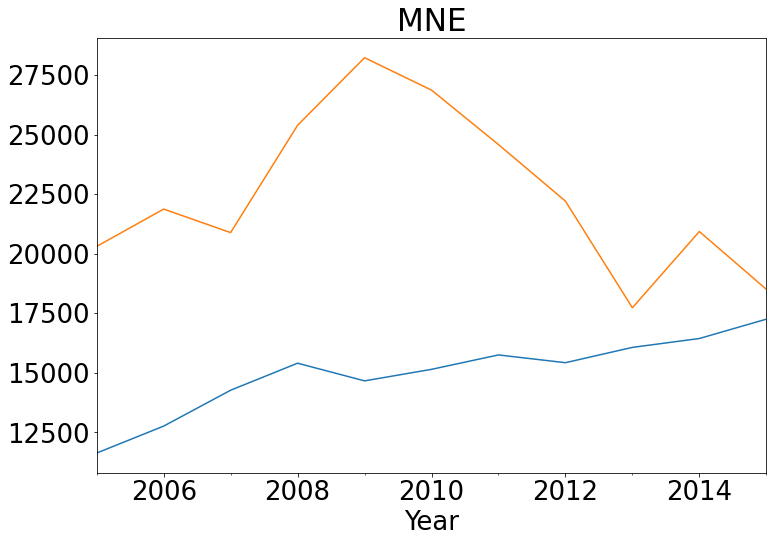

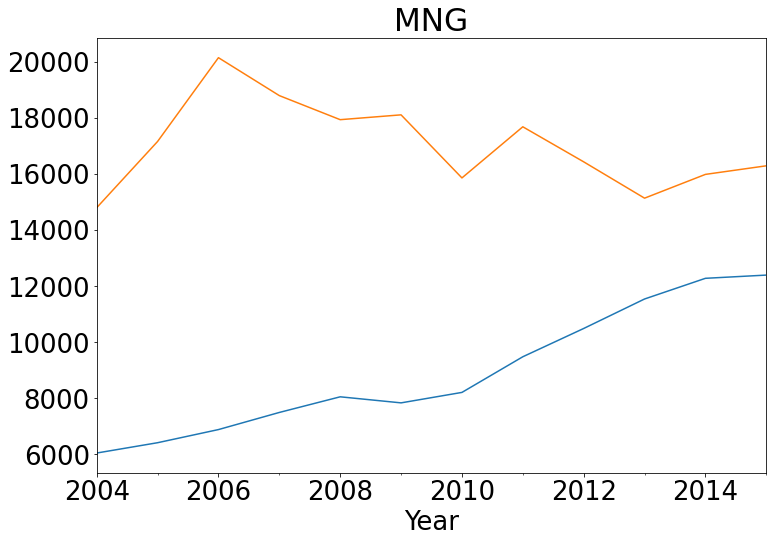

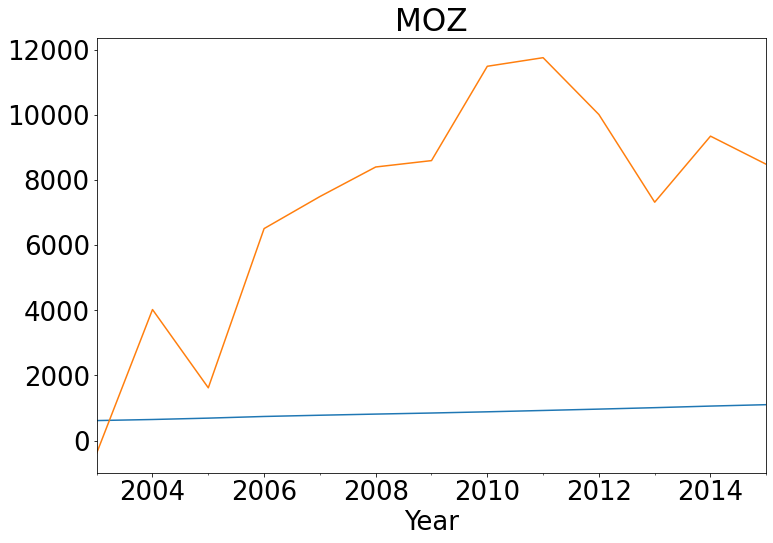

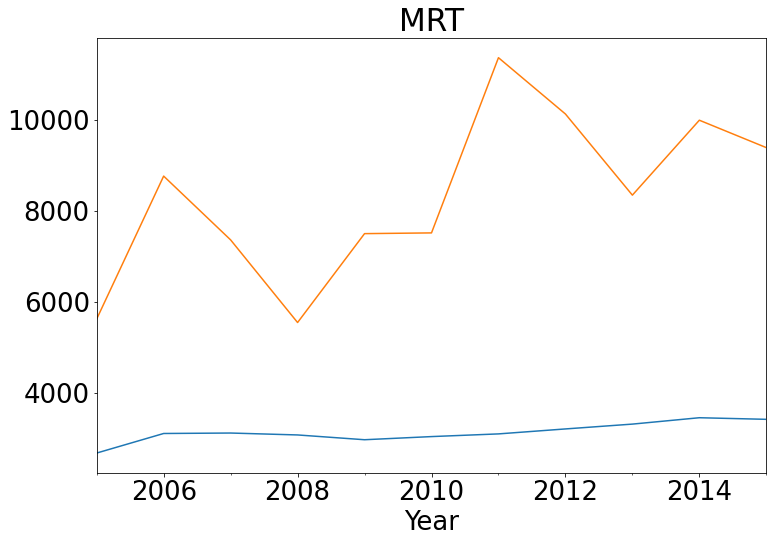

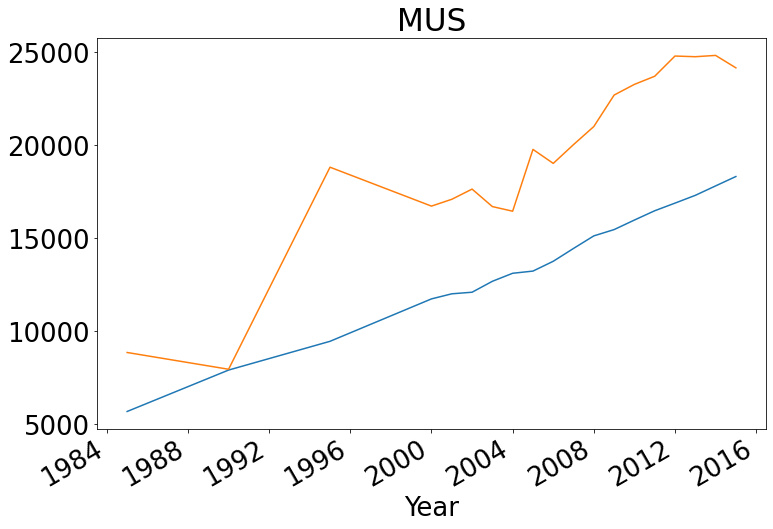

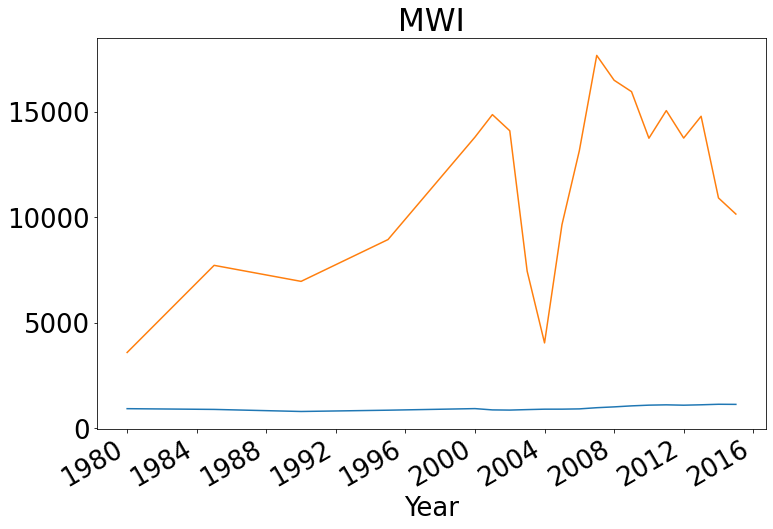

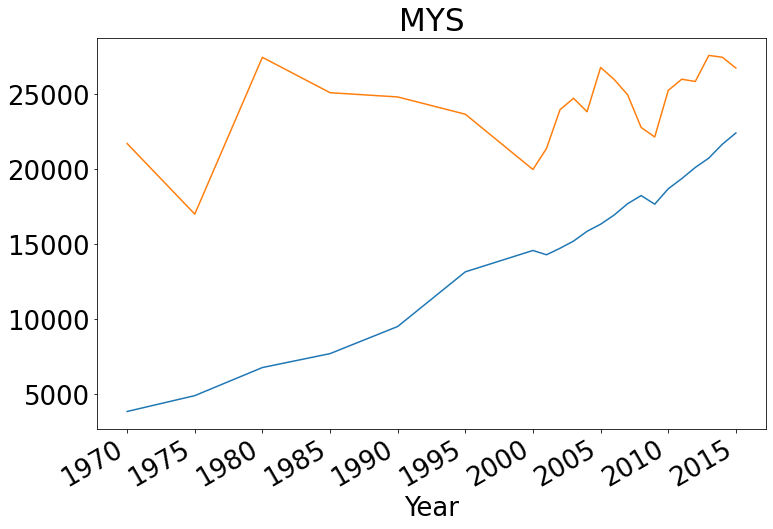

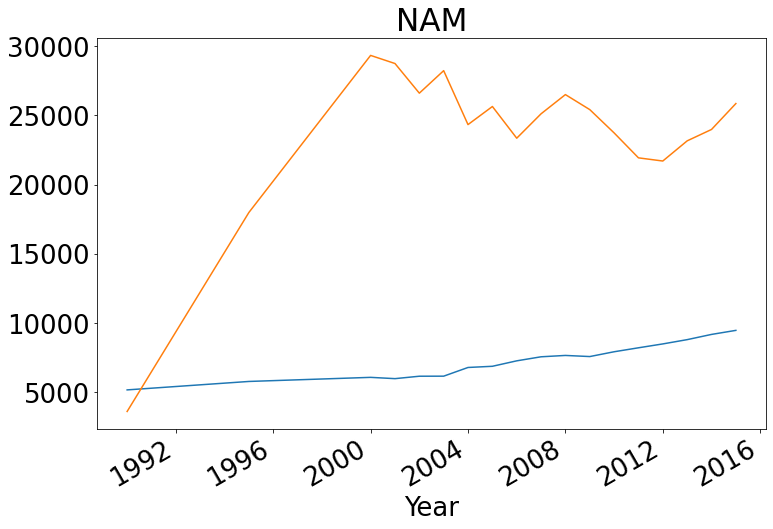

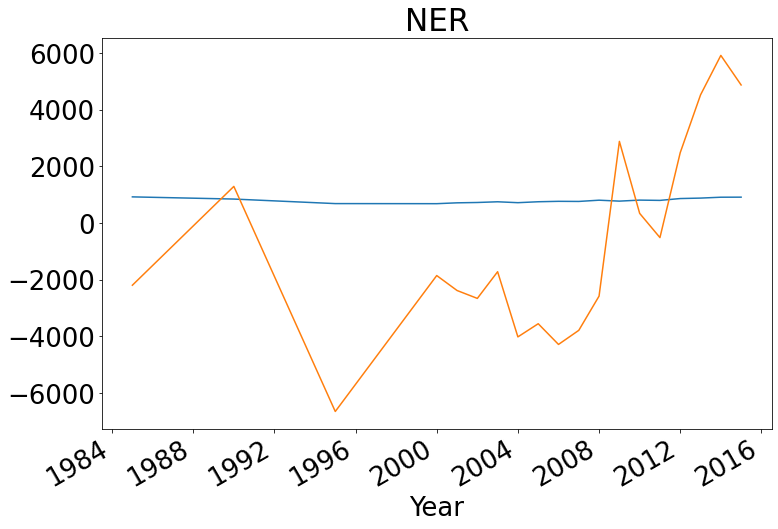

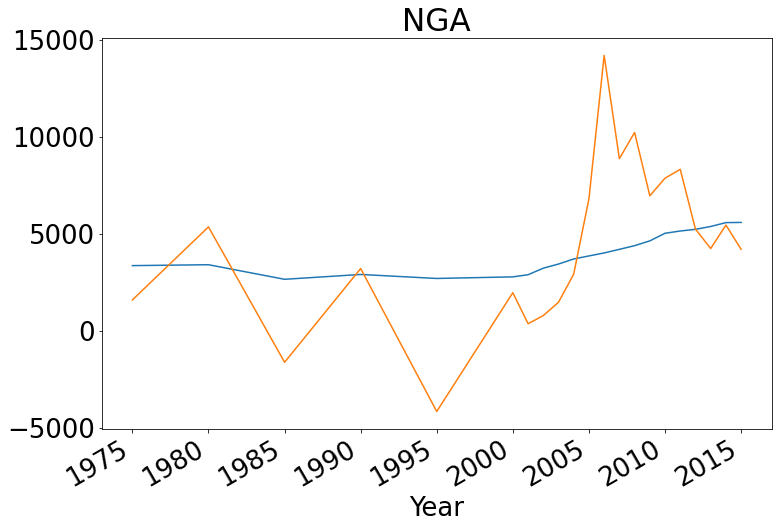

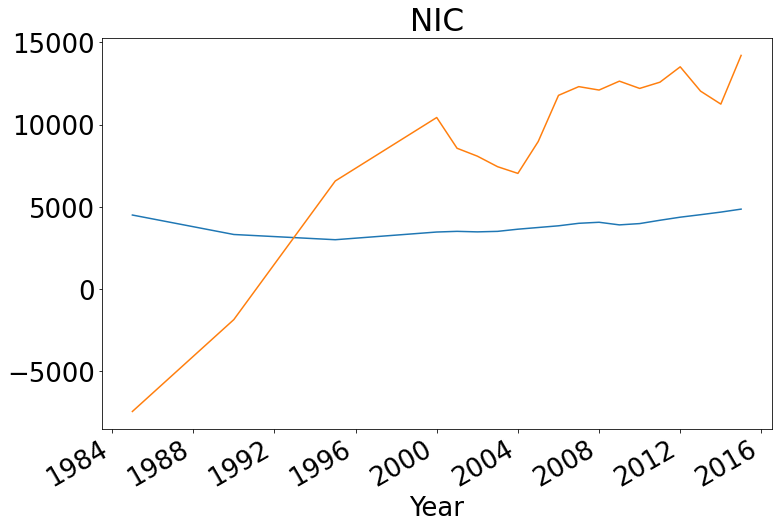

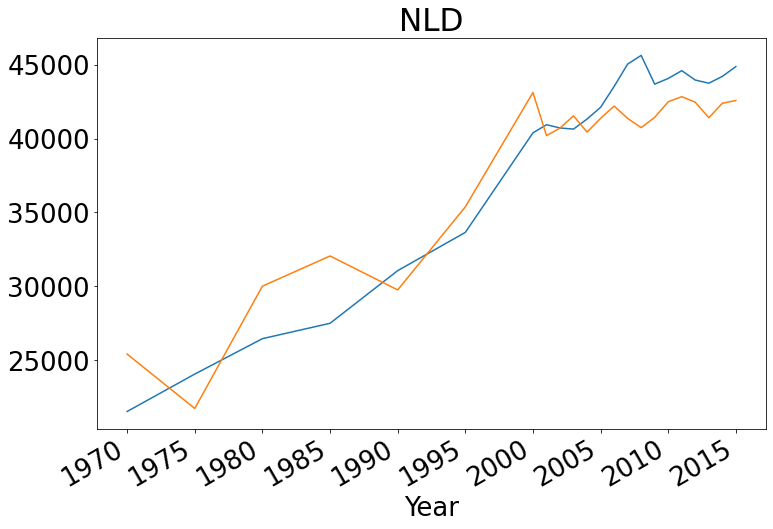

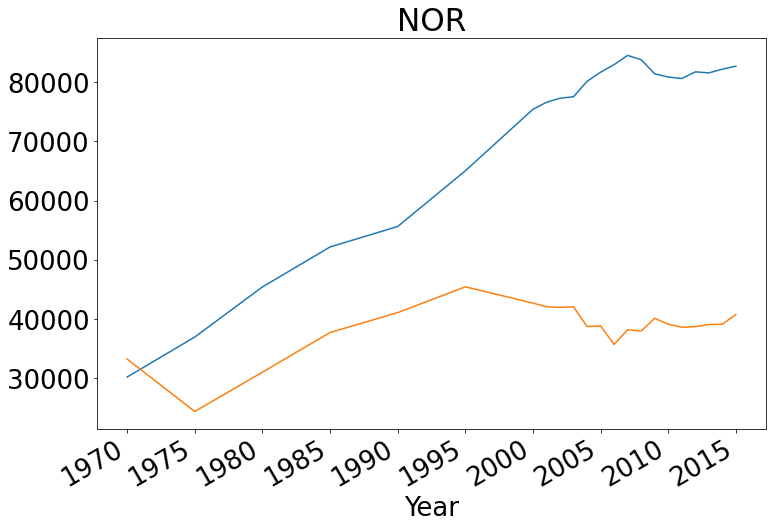

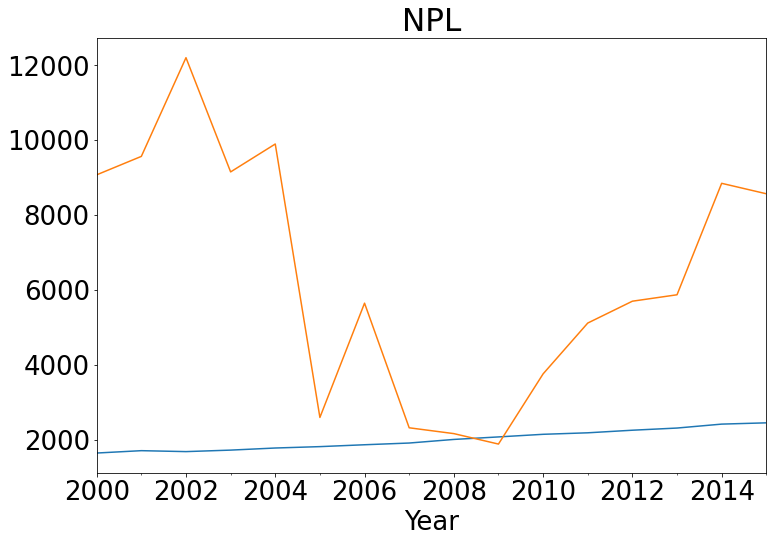

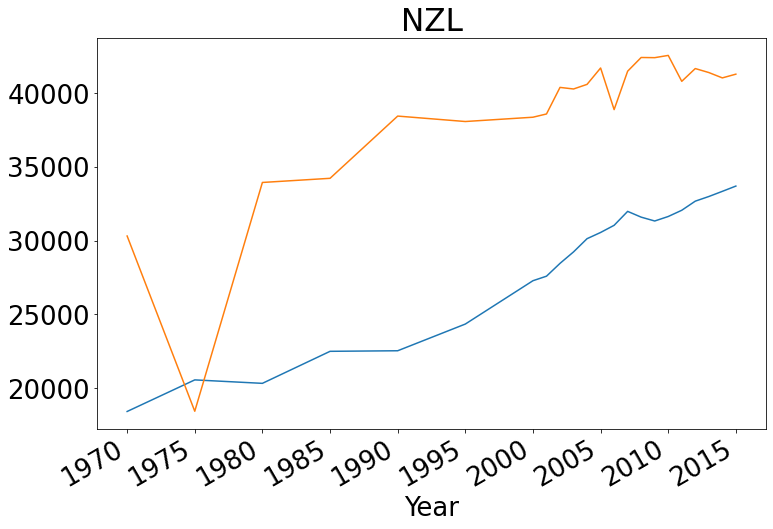

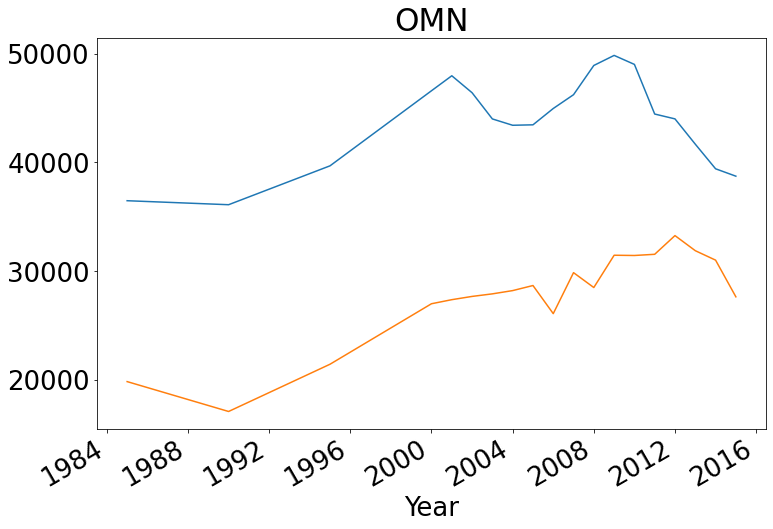

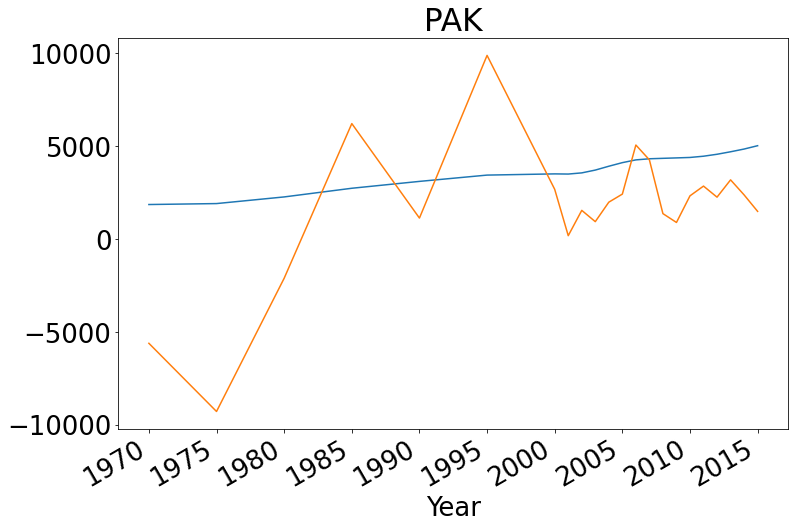

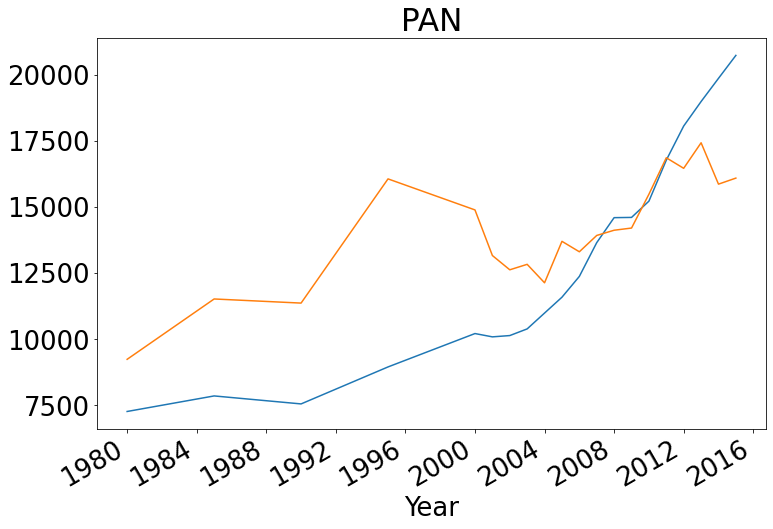

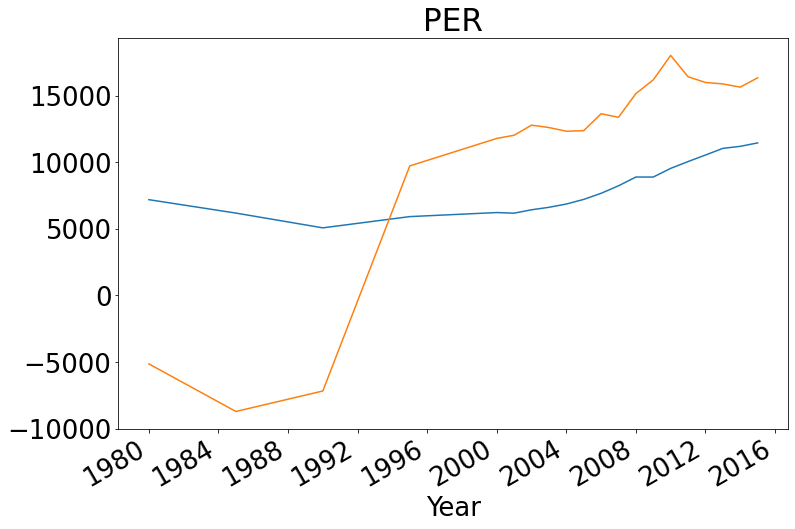

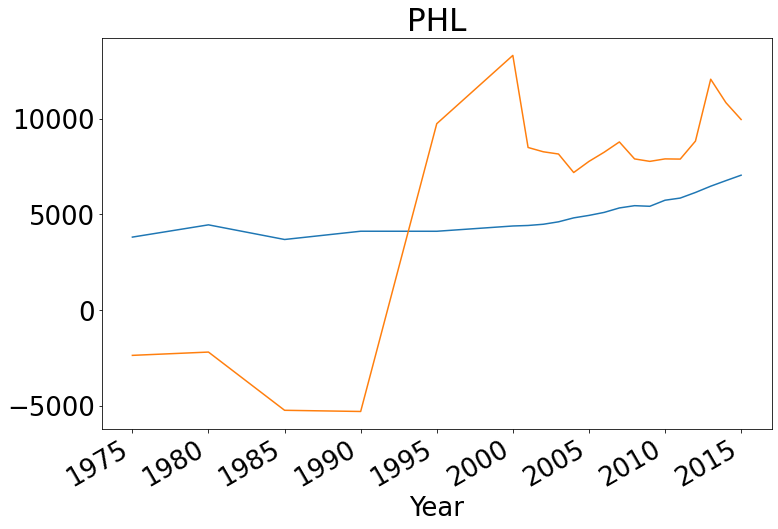

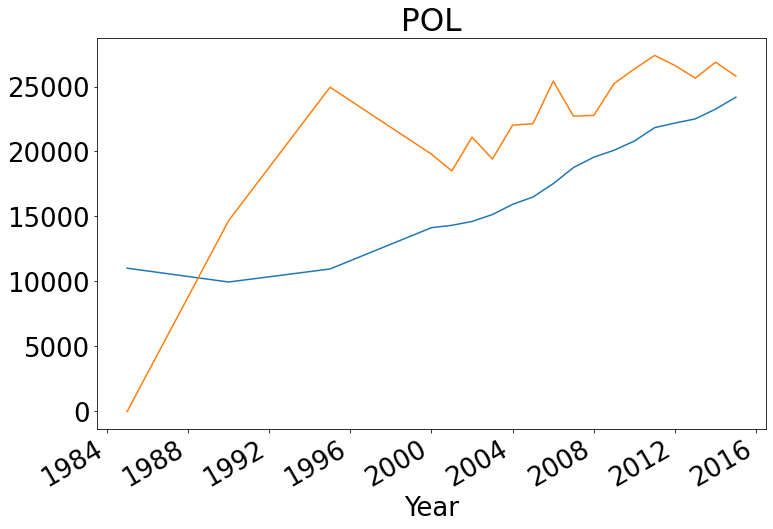

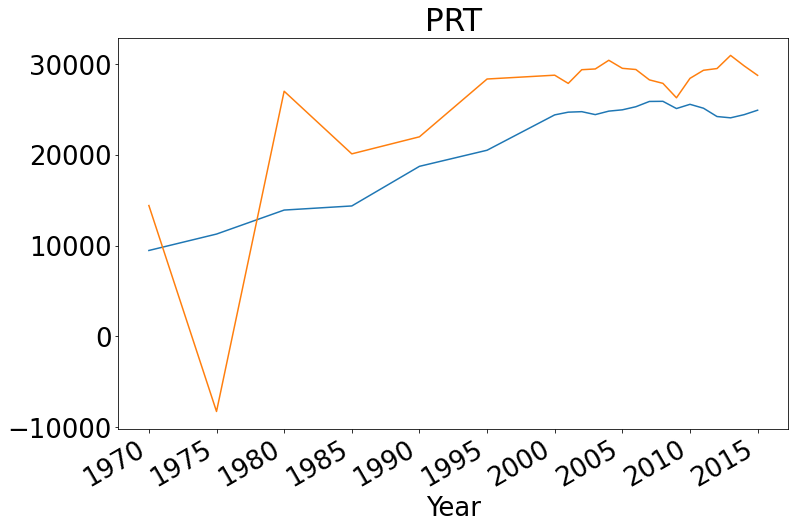

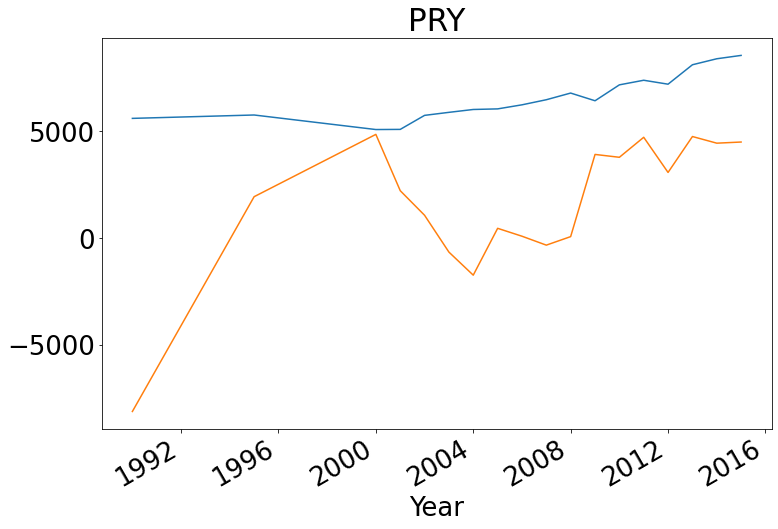

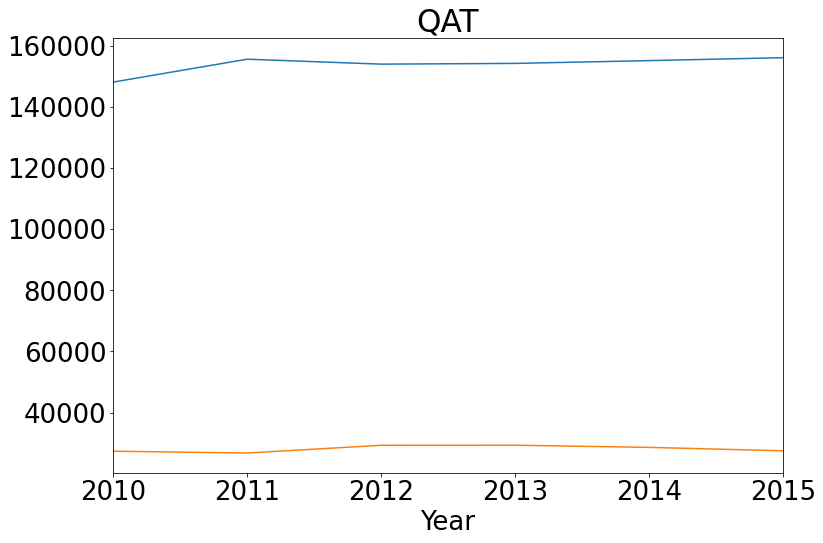

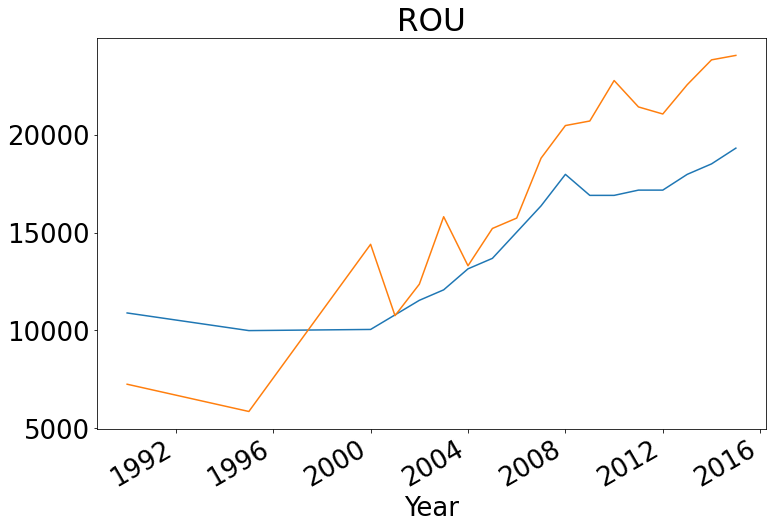

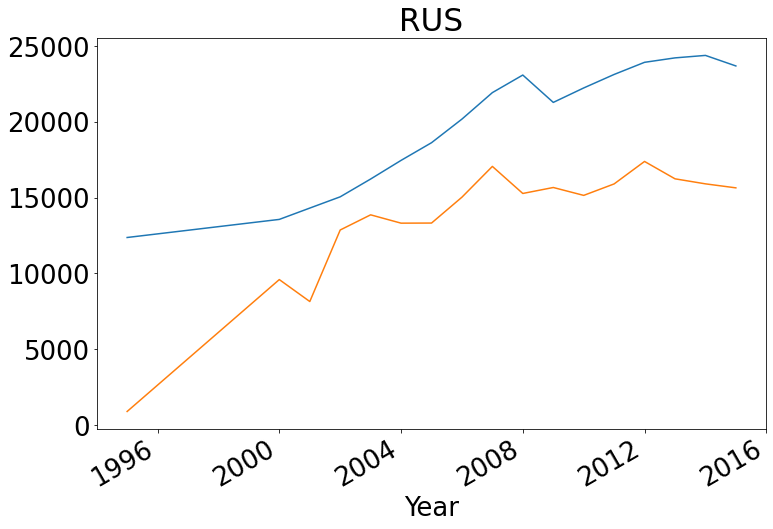

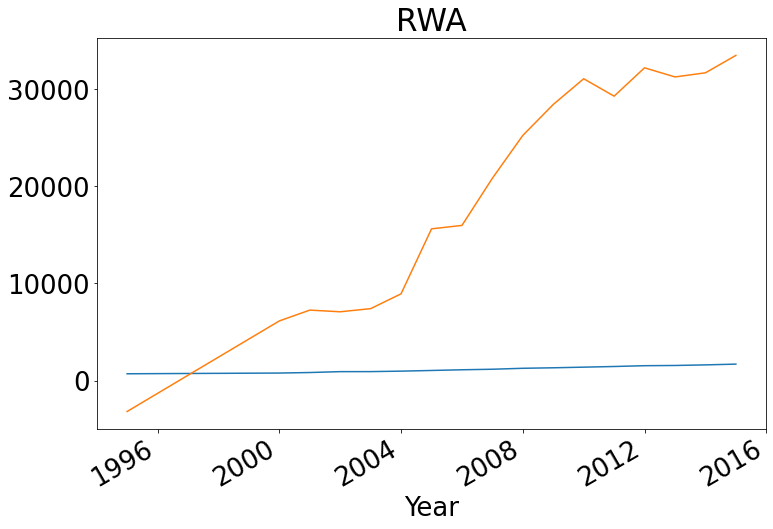

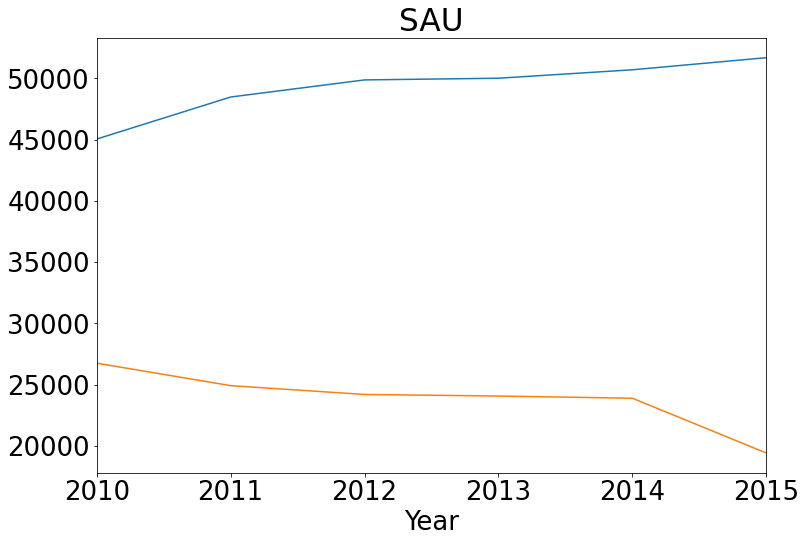

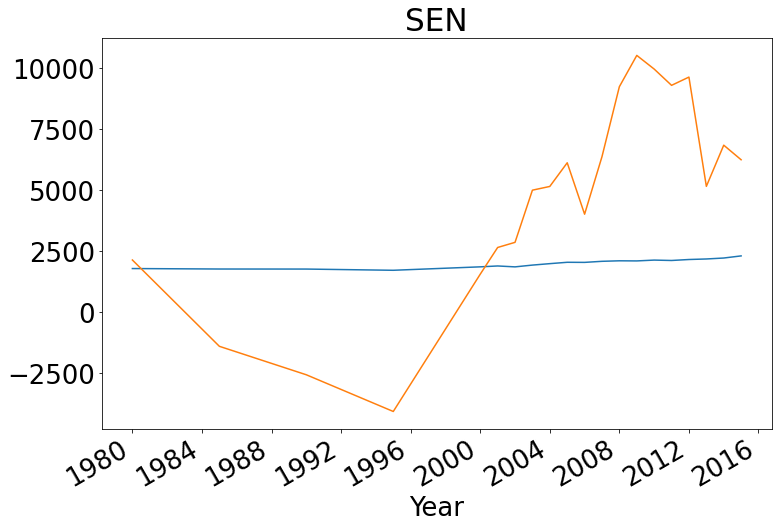

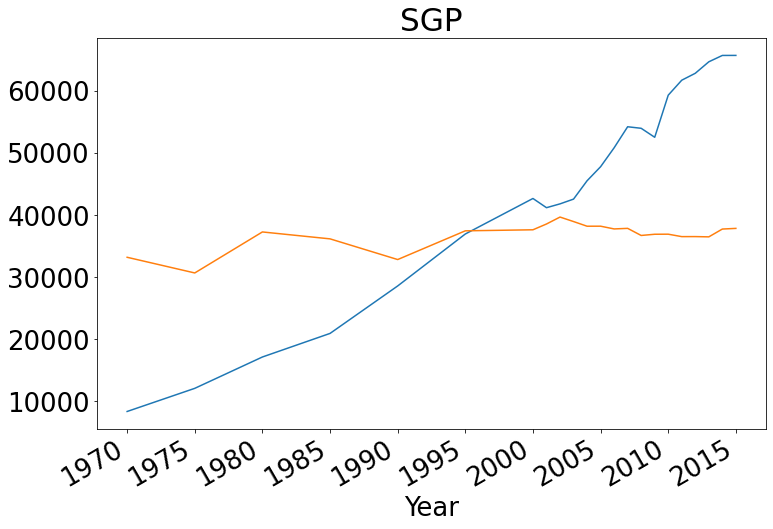

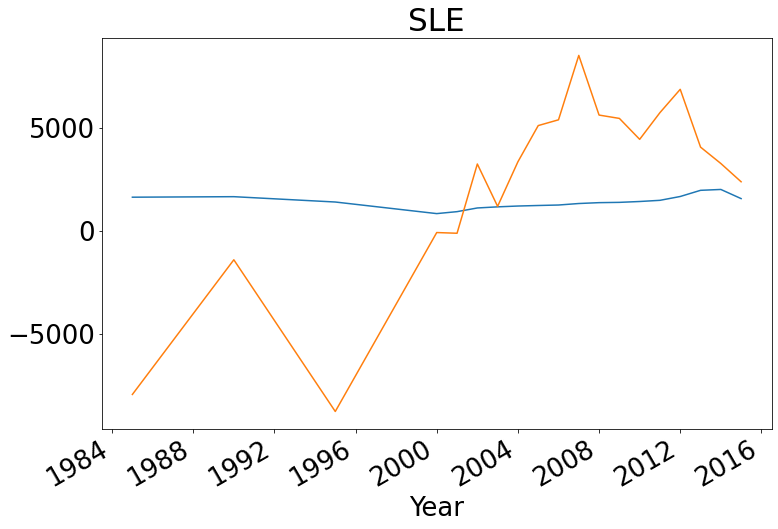

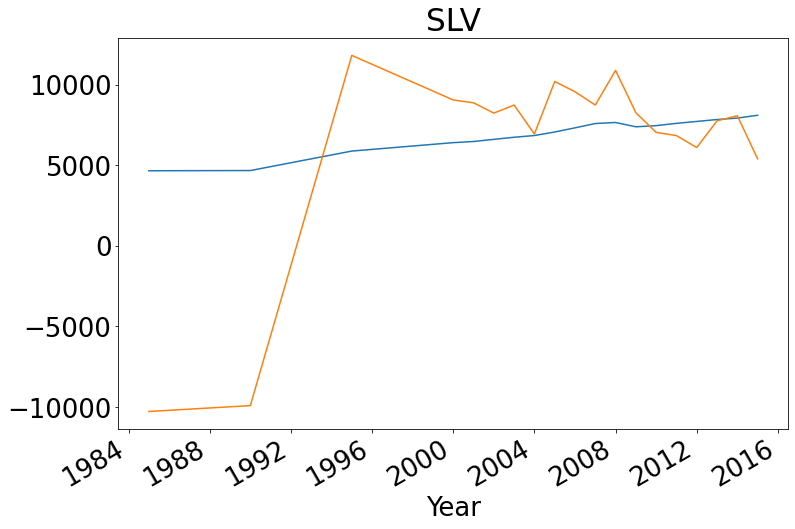

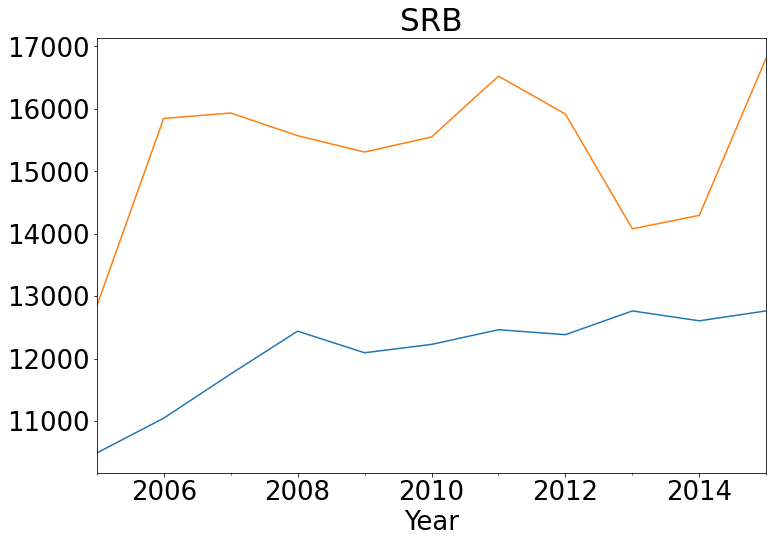

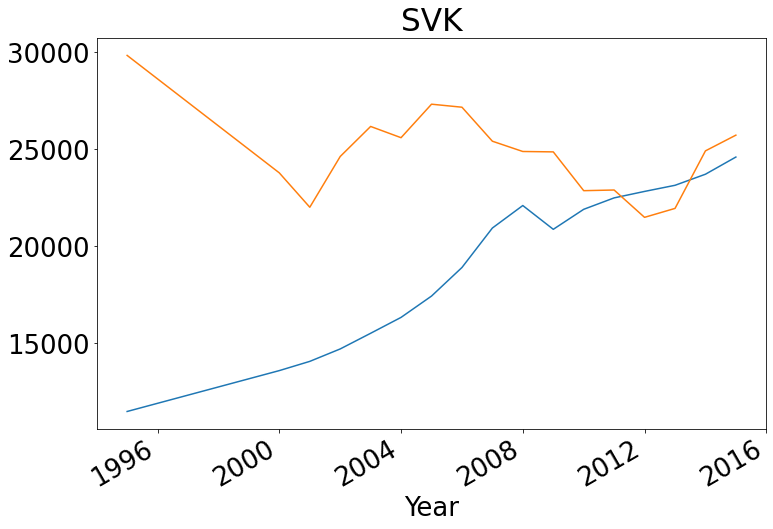

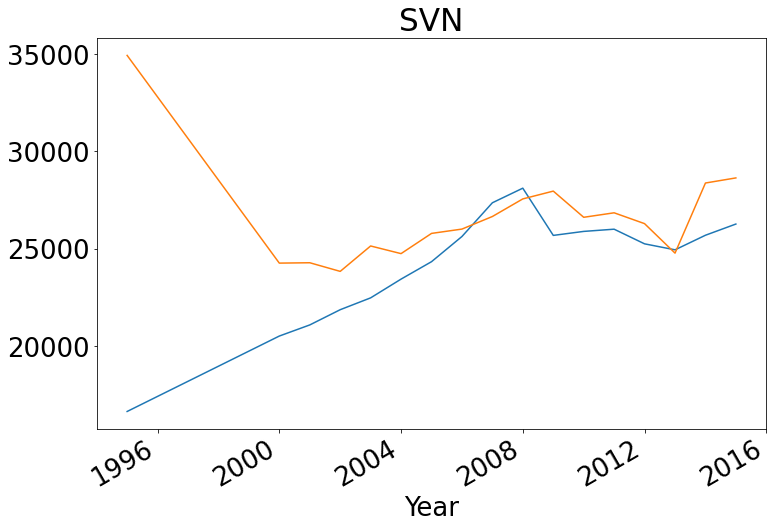

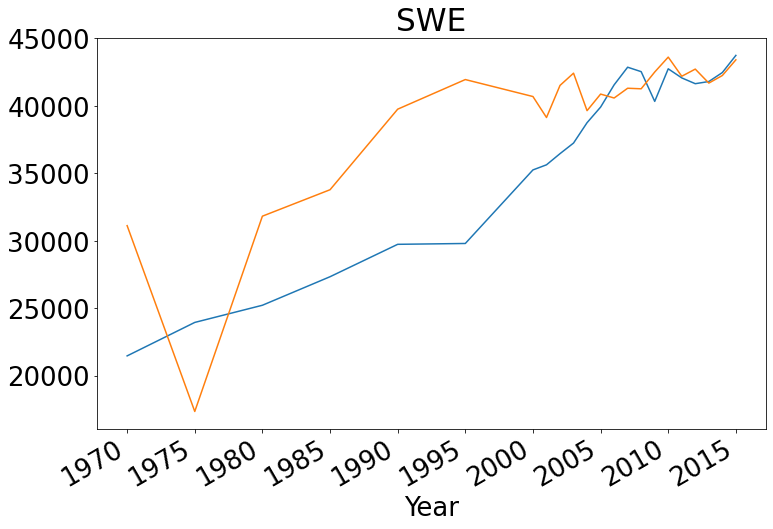

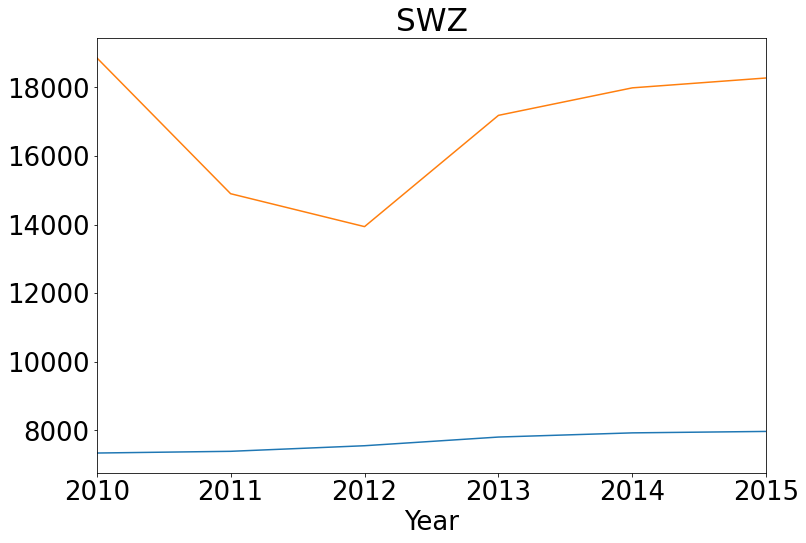

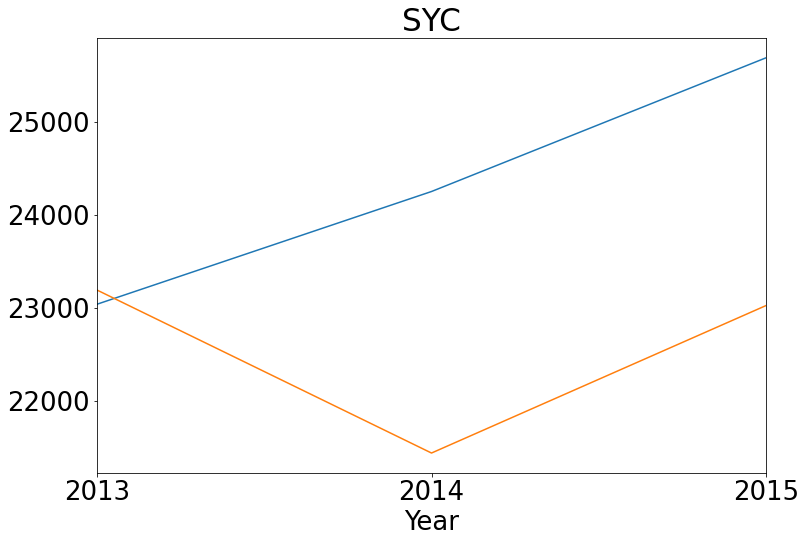

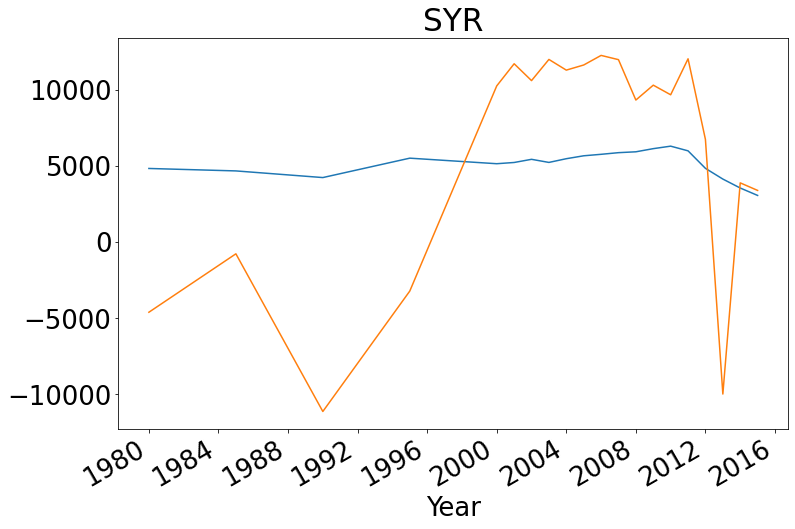

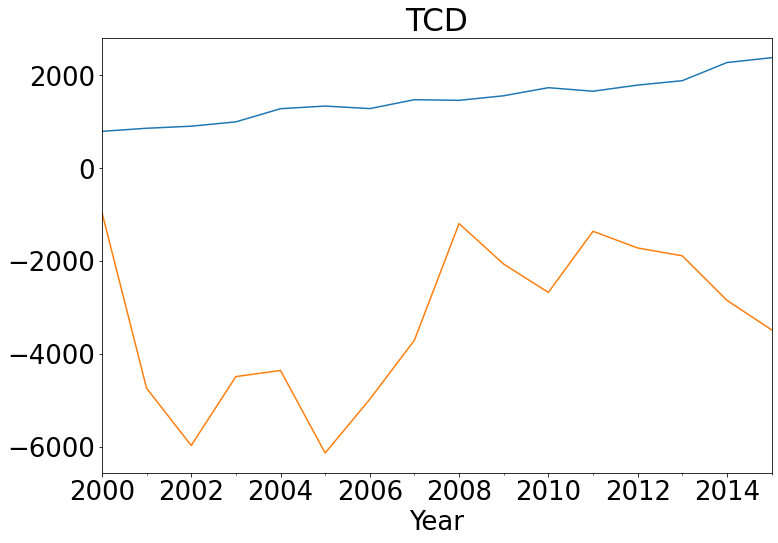

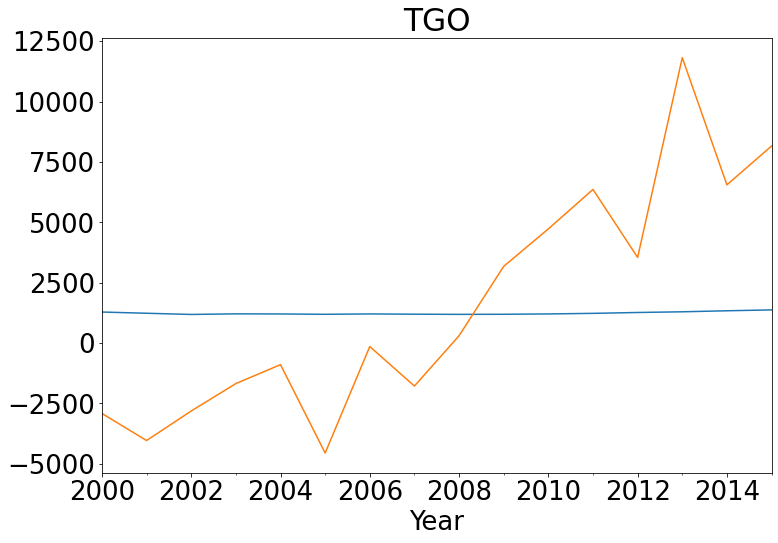

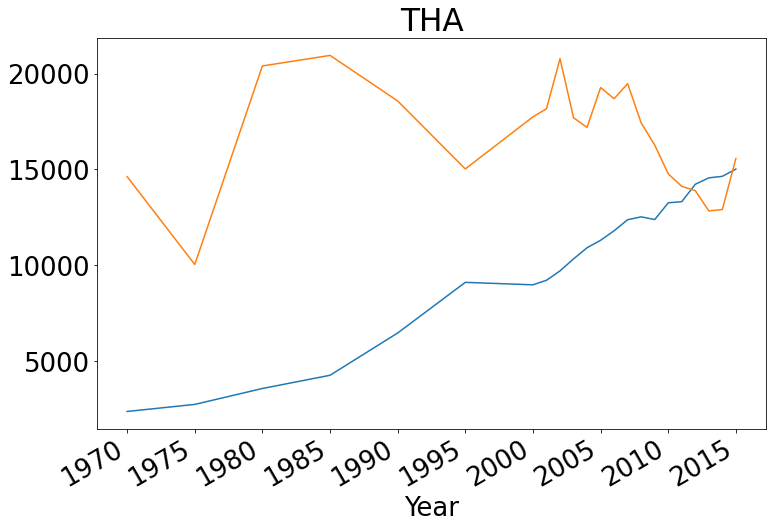

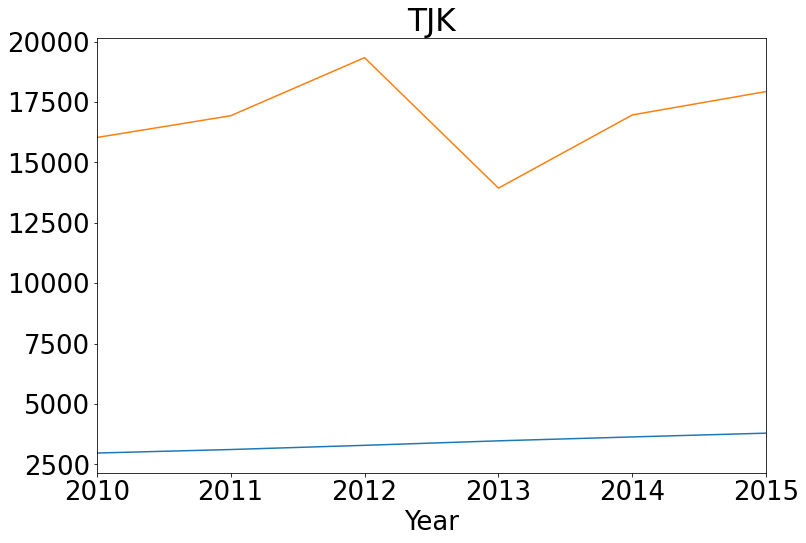

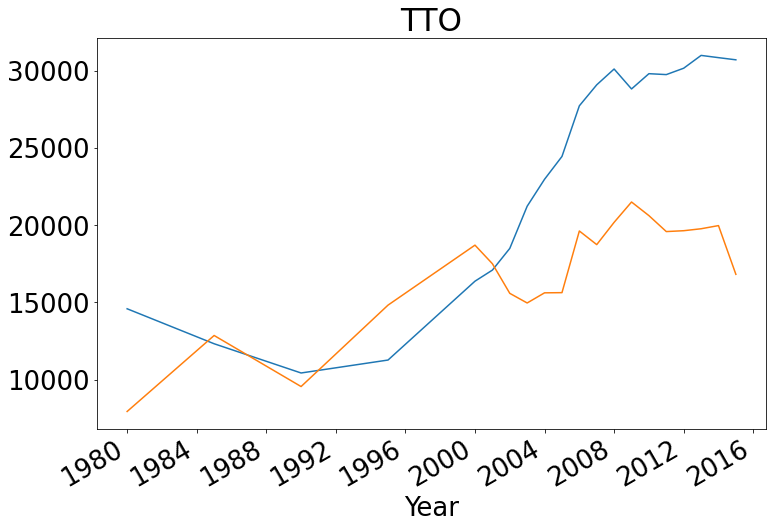

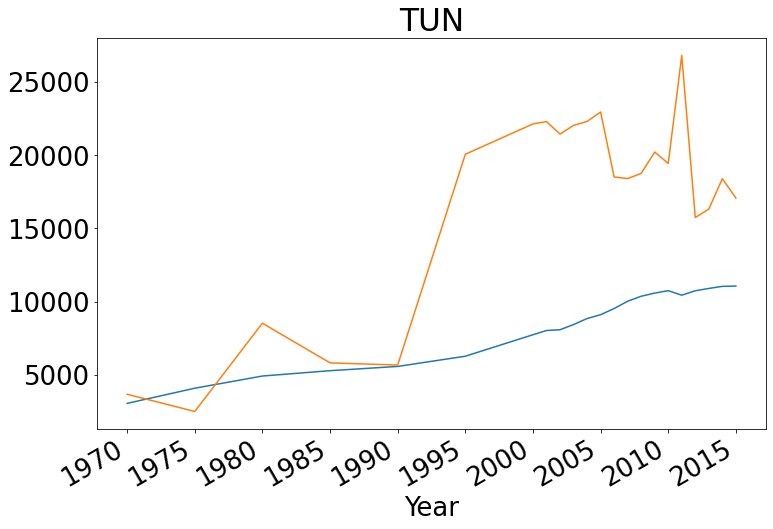

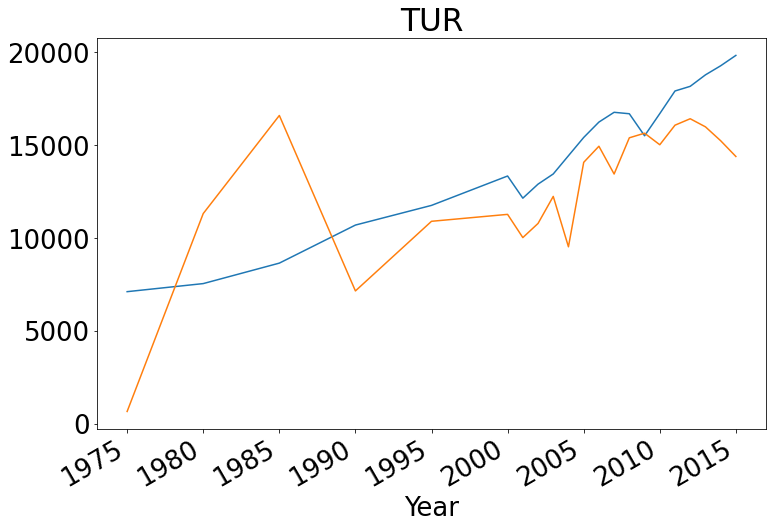

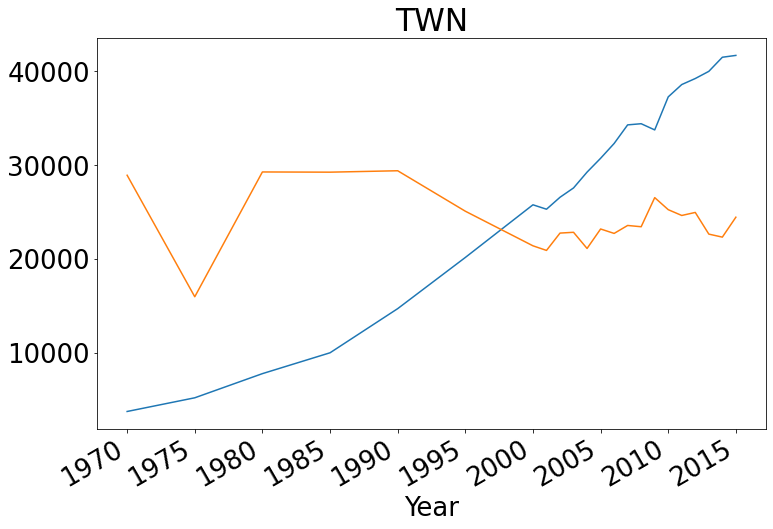

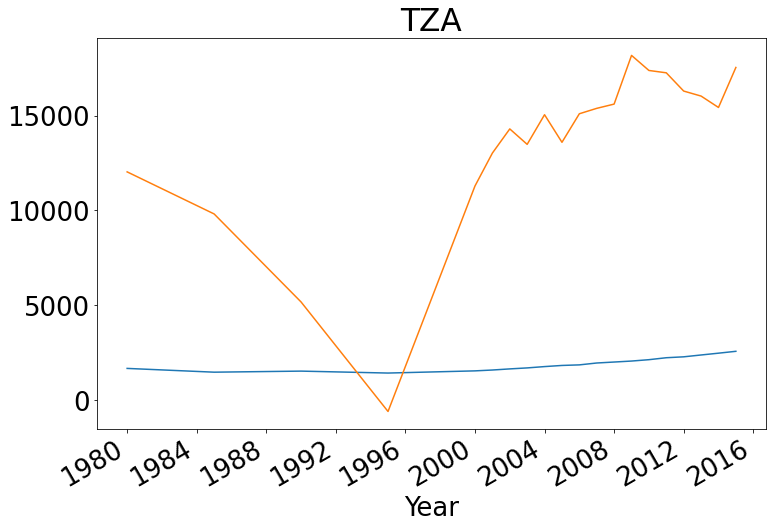

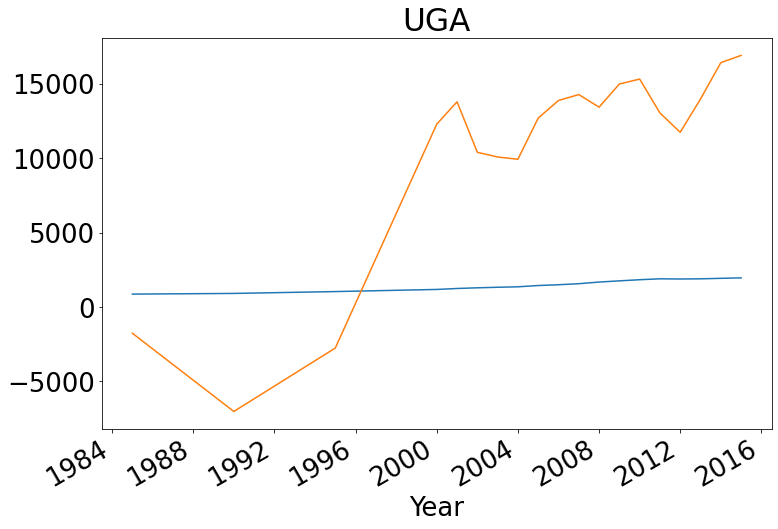

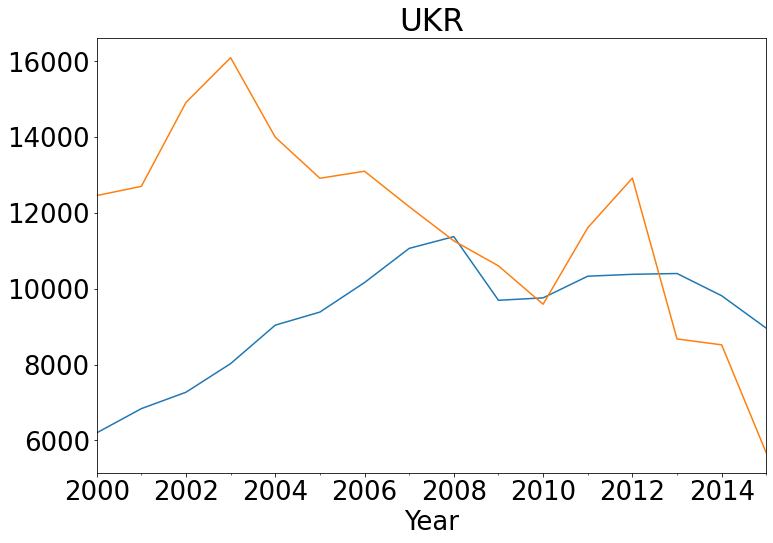

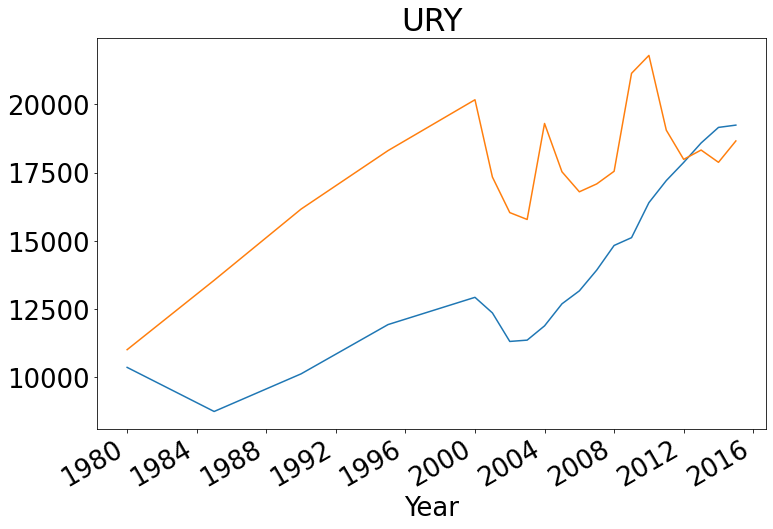

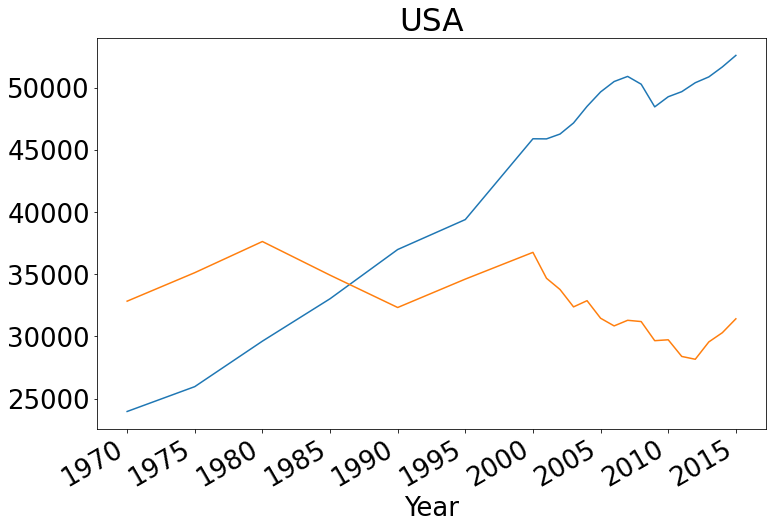

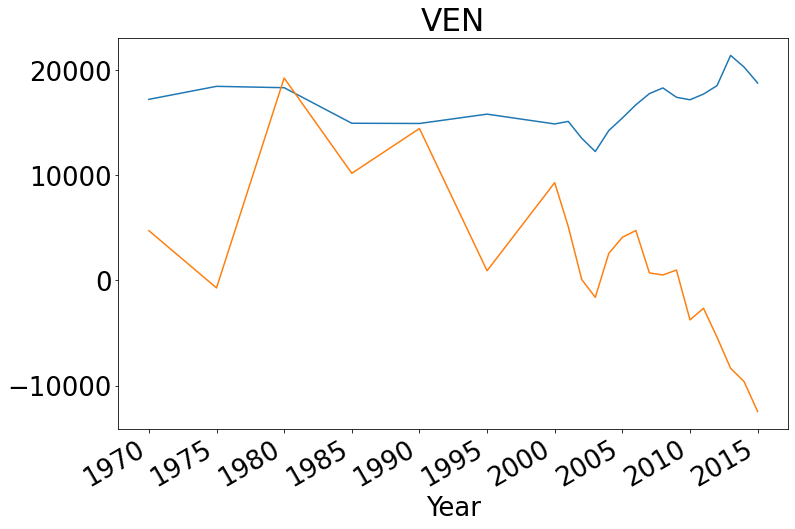

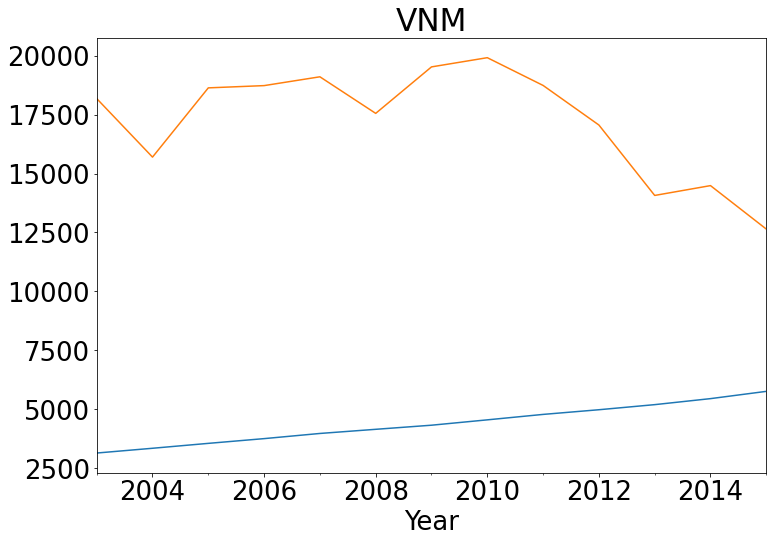

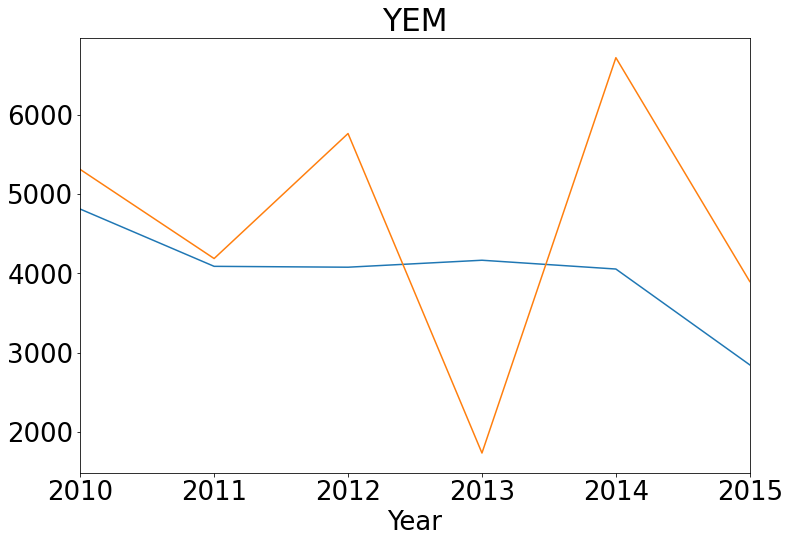

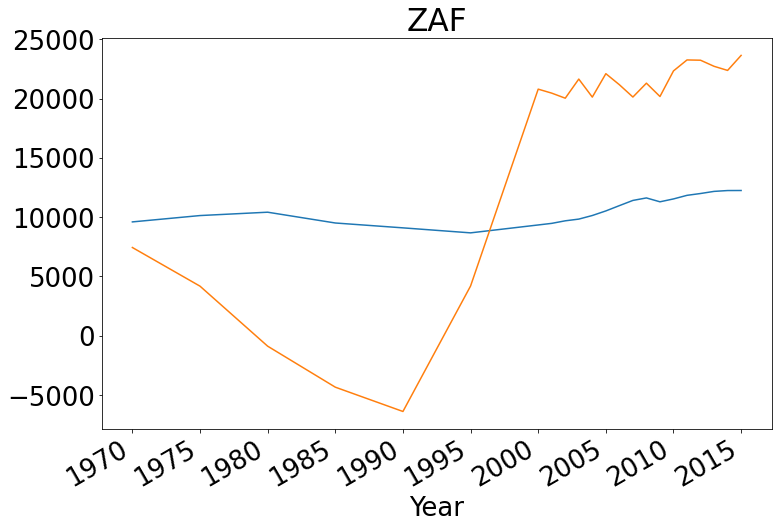

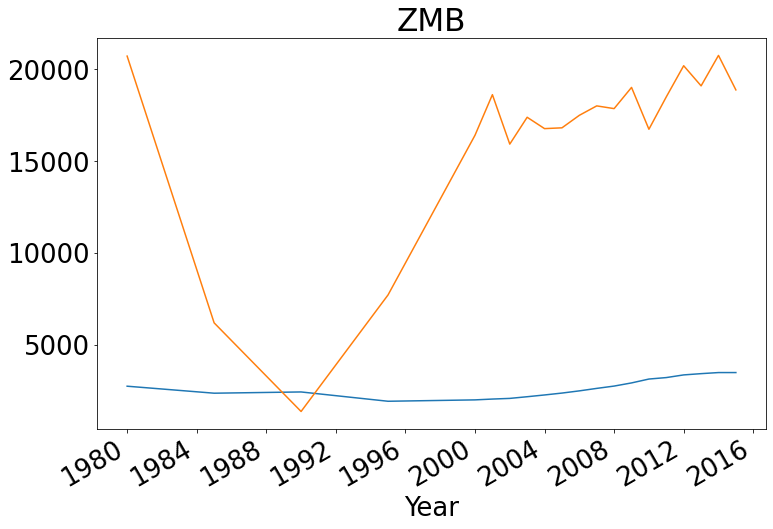

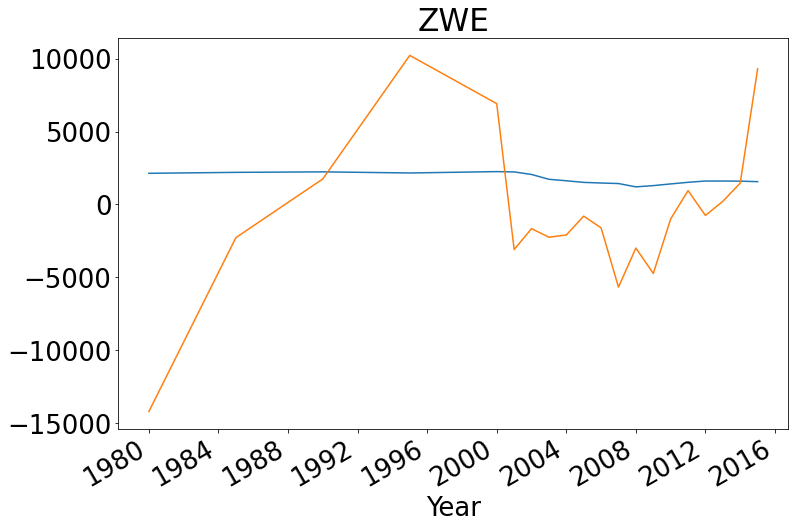

In [43]:
countries = reg_data.groupby("ISO_Code").mean().index
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax, legend = False)    
    ax.set_title(country)